#### Table of Contents

1. [Introduction](#1)<br>
2. [Problem Definition](#2)<br>
    A. [Goal](#21)<br>
    B. [Variables](#22)<br>
3. [Loading and Exploring Data](#3)<br>
    A. [Loading libraries](#31)<br>
    B. [Setup](#32)<br>
    C. [Version](#33)<br>
4. [Exploratory Data Analysis(EDA)](#4)<br>
    A. [Reading the data](#41)<br>
    B. [Data size and structure](#42)<br>
5. [Exploring some of the most important variables](#5)<br>
    A. [The response variable; KWH](#51)<br>
    B. [The most important numeric predictors](#52)<br>
    B.1 [Correlations with KWH](#53)<br>
6. [Missing data and label encoding](#6)<br>
    A. [Completeness of the data](#61)<br>
    B. [Label encoding](#62)<br>
7. [Visualization of important variables](#7)<br> 
    A. [Finding variable importance with a quick XGBRegressor](#71)<br>
    B. [Construction material and energy consumption](#72)<br>
    C. [Household information and energy consumption](#73)<br>
    D. [Kitchen appliances and energy consumption](#74)<br>
    E. [House information and energy consumption](#75)<br>
8. [Data Preprocessing](#8)<br>
    A.[Dropping highly correlated variables](#81)<br>
    B.[checking the outlier](#82)<br>
    C.[Removing the outlier](#83)<br>
9. [Feature Engineering](#9)<br>
    A.[Feature Extraction](#91)<br>
    B.[Data Normalization](#92)<br>
    C.[Feature Selection based on Feature Importance](93)<br>
10. [Modeling](#10)<br>
    A. [Machine Learning Pipeline](#101)<br>
    B. [Deep Learning ](#102)<br>

11. [Summary and Conclusion](#11)<br>
    
12. [References](#12)<br>

<a id="1"></a>
## 1.Introduction

The Residential Energy Consumption Survey (RECS) is a national area-probability sample survey that statistically identifies housing units across the United States to collect energy-related data for occupied primary residential units. <br>

This survey mainly focused on Residential Energy Consumption to  to provide information about their household characteristics, energy-using equipments, fuels used, and other information related to energy use [1].

Moreover, this survey then used to estimate the total and average energy end uses at various levels of geography, by housing unit type, or other
tabulations of interest [2].

<img src="https://www.meaningfulwomen.com/wp-content/uploads/Watching-Your-Energy-Usage.jpg" width="500" height="250">

<a id="2"></a>
## 2.Problem Definition

The very first important questions we need to ask ourself is to understand the problem and how we can solve it. I would like to ask the following questions before starting any machine learning projects from my team leader. <br>



**General Questions**<br>

1- What is the problem?<br>
2- Why does the problem need to be solved?<br>
3- What exactly the business objective is? <br>
4- How does the company expect to use and benefit from this model?<br>
5- What are the current solution looks like (if any)?<br>
6- How would I solve the problem?<br>

And now I'd like to ask the following questions to better understand the problem before I start the project. <br>

1- Is there a pattern in energy consumption in general?<br>
2- Which housing characteristics have the most impact on energy consumption?<br>
3- How does the size of the house, the number of bedrooms and bathrooms, and a having a pool will impact energy consumption? <br>
4- Does the number of household members and the age of household members have an impact on energy consumption?<br>
5- Will construction materials like roof, wall and type of glass have any impact on the energy consumption?<br>
6- Is there an energy consumption pattern that is based on the year the house was built?<br>
7- How can kitchen appliances like dishwasher, microwave and oven make a difference on energy consumption?<br>

<a id="21"></a>
### A. Goal

The goal of this project is to explore the data, Prepare the data for further processig, and build a model that predicts the energy consumption. <br>

The objective variable is "KWH" which stands for kilowatt-hour.

<a id="22"></a>
### B. Variables

Objective variable: "KWH".

"Layout file", which contains descriptive labels and formats for each data variable.

<a id="3"></a>
## 3.Loading and Exploring Data

<a id="31"></a>
### A. Loading libraries

I will start by importing important libraries as follow:

In [6]:
from sklearn import model_selection, preprocessing, metrics
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from pandas import get_dummies
# import lightgbm as lgb
# import xgboost as xgb
# import seaborn as sns
import pandas as pd
# import numpy as np
# import matplotlib
# import sklearn
# import warnings

<a id="32"></a>
### B. Setup

I'm setting up essential visualisation here.

In [2]:
%matplotlib inline
%precision 4
plt.style.use('ggplot')
np.set_printoptions(suppress=True)
pd.set_option("display.precision", 15)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

<a id="33"></a>
### C. Version

Checking the versions of my main libraries that I'm going to use in this project.

In [3]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))

matplotlib: 3.3.1
sklearn: 0.22.2.post1
seaborn: 0.10.1
pandas: 1.1.1
numpy: 1.18.5


<a id="4"></a>
## 4.Exploratory Data Analysis(EDA)

<a id="41"></a>
### A. Reading the data

Below, I am reading the csv’s as dataframes.

In [11]:
#data file
data = pd.read_csv('recs2009_public.csv')

#"Layout file", which contains descriptive labels and formats for each data variable.
layout = pd.read_csv('public_layout.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (717,718) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
#display first 5 rows
data.head()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,1,2,4,12,2,2471.68,4742,1080,4953,1271,...,-2,4A,2117,56,4250,0.48,6,56,9,96
1,2,4,10,26,2,8599.17,2662,199,2688,143,...,-2,3C,62,26,2393,0.61,0,64,38,73
2,3,1,1,1,5,8969.92,6233,505,5741,829,...,-2,5A,2346,49,5654,0.48,3,52,12,88
3,4,2,3,7,2,18003.64,6034,672,5781,868,...,-2,5A,2746,0,4941,0.55,4,55,7,87
4,5,1,1,1,3,5999.61,5388,702,5313,797,...,-2,5A,2251,0,5426,0.61,4,50,13,90


In [9]:
layout.head()

,Variable Name,Variable Label,Variable Order in File,Variable Type,Length
0,DOEID,Unique identifier for each respondent,1,Character,5
1,REGIONC,Census Region,2,Numeric,8
2,DIVISION,Census Division,3,Numeric,8
3,REPORTABLE_DOMAIN,Reportable states and groups of states,4,Numeric,8
4,TYPEHUQ,Type of housing unit,5,Numeric,8


Let’s have a look at dataframe dimensionality and feature types for the 'data' and 'layout'.

<a id="42"></a>
### B. Data size and structure

In [7]:
data.shape, layout.shape

((12083, 940), (940, 5))

From the output, we can see that the 'data' contains 12083 rows and 940 columns and the 'layout' contains 940 rows and 5 columns.

In [8]:
# knowing the type of our dataframe.
numerical_feats = data.dtypes[data.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = data.dtypes[data.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  935
Number of Categorical features:  5


We can also use the info() method to output some general information about the dataframe:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 940 entries, DOEID to DesignDBT1
dtypes: float64(50), int64(885), object(5)
memory usage: 86.7+ MB


float(64), int(64), and object are the data types of our features. We see that 50 feature are of type float(64), 885 features are of type int(64), and 5 features are of type object.<br>
With this same method, we can easily see if there are any missing values. Here, we can see that the RangeIndex is: 12083 entries, 0 to 12082. This shows the same number of rows we saw before with shape. <br>
However, just to make sure, I'm going to use 'isnull()' method to check if we have any mising values.

The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [10]:
data.describe()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,PERIODKR,SCALEKER,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
count,12083.000000000000000,12083.000000000000000,12083.000000000000000,12083.000000000000000,12083.000000000000000,12083.000000000000000,12083.000000000000000,12083.000000000000000,12083.000000000000000,12083.000000000000000,...,12083.000000000000000,12083.000000000000000,12083.000000000000000,12083.000000000000000,12083.000000000000000,12083.000000000000000,12083.000000000000000,12083.000000000000000,12083.000000000000000,12083.000000000000000
mean,6042.000000000000000,2.628320781262931,5.373086154100803,14.783662997599933,2.659604402880079,9402.981869568866387,4141.375237937598285,1415.406107754696677,4135.146983365058077,1443.503103533890680,...,-1.935943060498221,-1.955391872879252,1681.961764462467954,139.568484647852358,3763.728544235702884,0.499035835471326,5.656045684018870,59.128693205329803,20.256310518910865,90.359430604982208
std,3488.205985890167995,1.042142489825018,2.859366154749910,8.195824288132187,1.192627330490439,5192.101419492415516,2317.759374592790664,1134.659475202672638,2260.543685508750968,1021.748721787580735,...,0.589907105440863,0.415810309911863,1401.079218385106515,264.186907771660401,2597.754418723736762,0.083519992206056,6.797205075872645,8.678293010725797,15.337626116789929,6.166669228695778
min,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,476.100000000000023,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,...,-2.000000000000000,-2.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.310000000000000,0.000000000000000,36.000000000000000,-23.000000000000000,60.000000000000000
25%,3021.500000000000000,2.000000000000000,3.000000000000000,8.000000000000000,2.000000000000000,6297.039999999999964,2197.500000000000000,561.000000000000000,2224.000000000000000,712.000000000000000,...,-2.000000000000000,-2.000000000000000,262.500000000000000,4.000000000000000,1246.500000000000000,0.430000000000000,1.000000000000000,52.000000000000000,9.000000000000000,87.000000000000000
50%,6042.000000000000000,3.000000000000000,5.000000000000000,15.000000000000000,2.000000000000000,7970.630000000000109,4483.000000000000000,1045.000000000000000,4502.000000000000000,1179.000000000000000,...,-2.000000000000000,-2.000000000000000,1684.000000000000000,30.000000000000000,3878.000000000000000,0.500000000000000,3.000000000000000,58.000000000000000,18.000000000000000,90.000000000000000
75%,9062.500000000000000,3.000000000000000,7.000000000000000,21.000000000000000,3.000000000000000,11330.030000000000655,5913.000000000000000,1897.000000000000000,5854.000000000000000,1842.500000000000000,...,-2.000000000000000,-2.000000000000000,2662.000000000000000,117.000000000000000,5834.000000000000000,0.560000000000000,7.000000000000000,66.000000000000000,33.000000000000000,94.000000000000000
max,12083.000000000000000,4.000000000000000,10.000000000000000,27.000000000000000,5.000000000000000,95779.139999999999418,12525.000000000000000,5480.000000000000000,13346.000000000000000,5357.000000000000000,...,5.000000000000000,3.000000000000000,7623.000000000000000,1884.000000000000000,11567.000000000000000,0.800000000000000,34.000000000000000,89.000000000000000,67.000000000000000,118.000000000000000


In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the include parameter.

In [11]:
data.describe(include=['object'])

,METROMICRO,UR,NOCRCASH,NKRGALNC,IECC_Climate_Pub
count,12083,12083,12083,12083,12083
unique,3,2,29,21,11
top,METRO,U,-2,-2,4A
freq,10302,9656,9958,9958,2703


Lets check the first two features. 

Here we can see how many unique values we have for the categorical features, what is the top value and its frequencies

In [12]:
data['METROMICRO'].value_counts()

METRO    10302
MICRO     1109
NONE       672
Name: METROMICRO, dtype: int64

based on the information provided government: <br>

METRO: Housing unit in Census Metropolitan Statistical Area<br>
MICRO: Housing unit in Census Micropolitan Statistical Area<br>
NONE:  Housing unit in neither<br>

We can see that the number of homes located in the Metropolitan Area is around 9 times greater than other areas.

In [13]:
data['UR'].value_counts(normalize=True)

U    0.79913928660101
R    0.20086071339899
Name: UR, dtype: float64

U: Urban<br>
R: Rural<br>
This indicates that in urban areas about 80% of the houses are located.

<a id="5"></a>
## 5.Exploring some of the most important variables

<a id="51"></a>
### A. The response variable; KWH


Up to this level, we've got a general understanding of our dataset and what we're dealing with. <br>

Now, I 'd like to dive deeper into our target feature which is "KWH".

In [14]:
data['KWH'].describe()

count     12083.000000000000000
mean      11288.159397500619889
std        7641.190845178832205
min          17.000000000000000
25%        5837.000000000000000
50%        9623.000000000000000
75%       14765.000000000000000
max      150254.000000000000000
Name: KWH, dtype: float64

We can see the mean from described method is 11288 KWH and the std is 7641 KWH. It also shows that the min and max are 17 KWH and and 150254 KWH respectively.<br>

Moreover, the Median which is 50% quartile is 9623 KWH, the lower quartile (25%) is 5837 KWH and the higher quartile (75%) is 14765 KWH.<br>


A high standard deviation indicates that the data points are spread out over a large range of values and have a large distance from the mean.

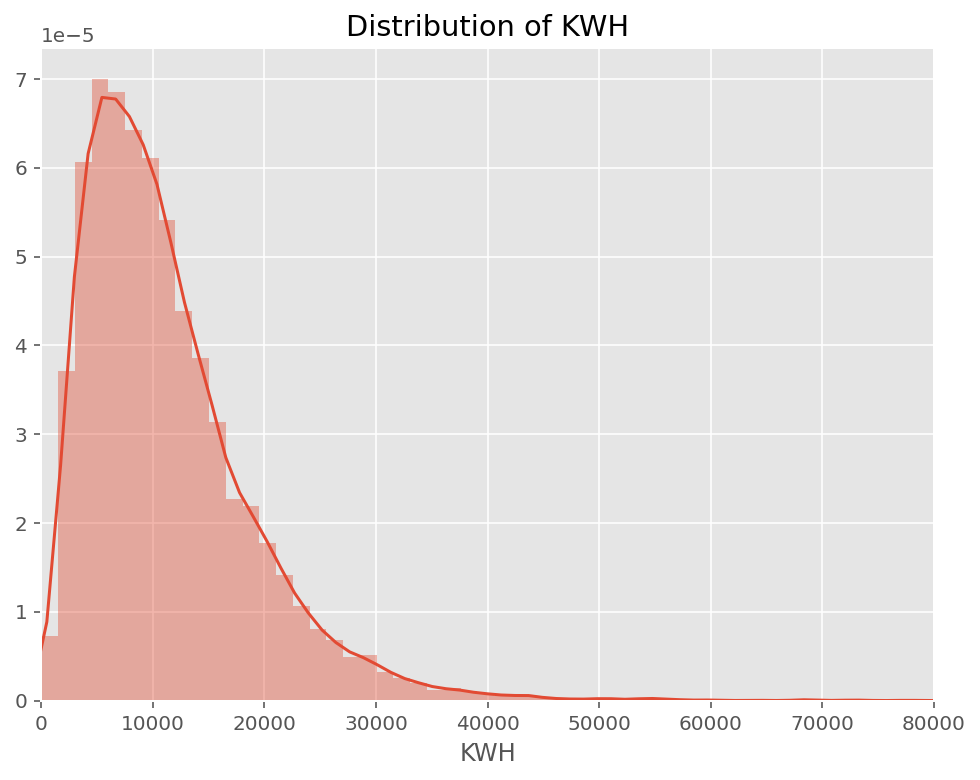

In [15]:
fig, ax = plt.subplots(figsize=[8,6])
ax.set_xlim(0,80000)
sns.distplot(data['KWH'],ax=ax, bins=100).set_title('Distribution of KWH');

The distribution of 'KWH' shows that the it is not normally distributed and has a long tail toward the right (positive skewness). <br>

Let's look first at KWH's skewness and kurtosis.

In [16]:
#skewness and kurtosis
print("Skewness: %f" % data['KWH'].skew())
print("Kurtosis: %f" % data['KWH'].kurt())

Skewness: 2.114188
Kurtosis: 13.917123


To fix the skewness, I am taking the log of KWH.

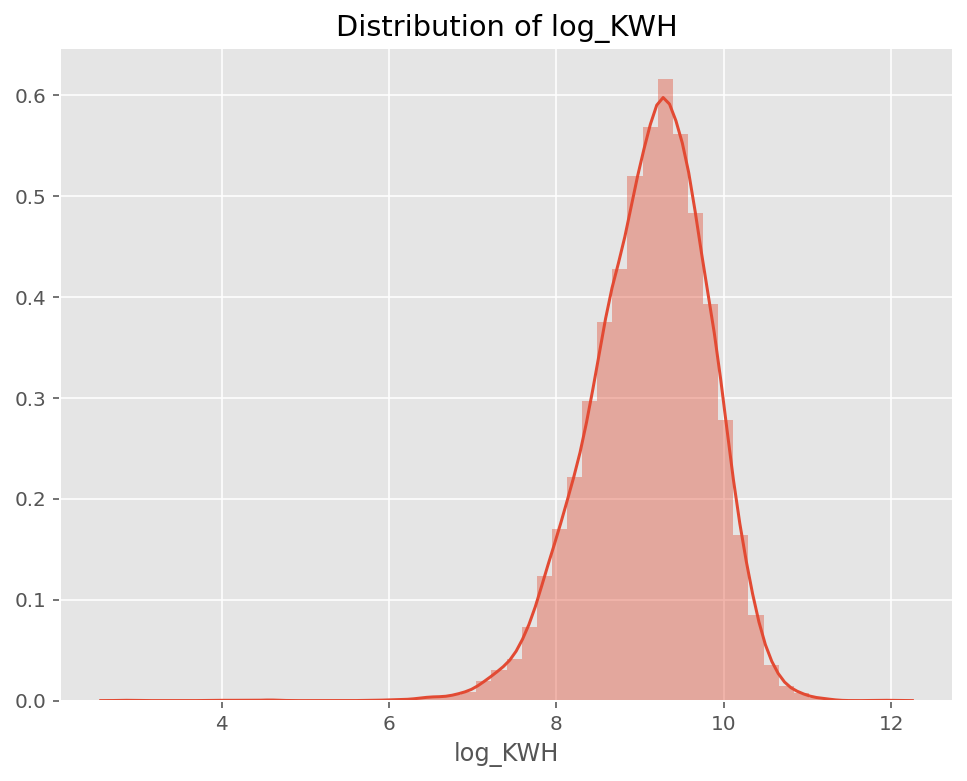

In [17]:
data['log_KWH'] = data['KWH'].map(np.log1p)
#Log plot
fig, ax = plt.subplots(figsize=[8,6])
#ax.set_xlim(0,80000)
sns.distplot(data['log_KWH'],ax=ax).set_title('Distribution of log_KWH');

<a id="52"></a>
### B. The most important numeric predictors

To get a feel of the dataset, I decided to first see which numeric variables have a high correlation with the KWH.

<a id="53"></a>
### B.1. Correlations with KWH

In [18]:
corr_matrix = data.corr()

In [19]:
threshold_corr = 0.4
corr_significant = corr_matrix["KWH"].copy(deep =True)
corr_significant = corr_significant.loc[(corr_significant.values > threshold_corr) | \
                                       (corr_significant.values < -threshold_corr)]
print(f"Significant target variables are: \n\n {corr_significant.index[1:].values}\n")
print('*'*55)
print(f"\nAnd also their correaltions are: \n\n{(np.round(corr_significant[1:].values,2 ))}")

Significant target variables are: 

 ['NCOMBATH' 'TOTROOMS' 'ACROOMS' 'TOTHSQFT' 'TOTCSQFT' 'KWH' 'KWHSPH'
 'KWHCOL' 'KWHWTH' 'KWHRFG' 'KWHOTH' 'BTUEL' 'BTUELSPH' 'BTUELCOL'
 'BTUELWTH' 'BTUELRFG' 'BTUELOTH' 'DOLLAREL' 'DOLELSPH' 'DOLELCOL'
 'DOLELWTH' 'DOLELRFG' 'DOLELOTH' 'TOTALBTUCOL' 'TOTALBTURFG'
 'TOTALBTUOTH' 'TOTALDOL' 'TOTALDOLCOL' 'TOTALDOLWTH' 'TOTALDOLRFG'
 'TOTALDOLOTH' 'log_KWH']

*******************************************************

And also their correaltions are: 

[0.42 0.44 0.44 0.41 0.48 1.   0.5  0.66 0.59 0.64 0.88 1.   0.5  0.66
 0.59 0.64 0.88 0.87 0.45 0.6  0.51 0.43 0.7  0.66 0.64 0.68 0.63 0.6
 0.44 0.43 0.66 0.89]


In [20]:
corr_significant.sort_values(ascending=False)

KWH            1.000000000000000
BTUEL          0.999999999934384
log_KWH        0.889121044519625
BTUELOTH       0.880402768338535
KWHOTH         0.880402705967663
DOLLAREL       0.868711981839555
DOLELOTH       0.702251492987547
TOTALBTUOTH    0.676107594064645
TOTALDOLOTH    0.655742075405126
BTUELCOL       0.655103528503346
KWHCOL         0.655103513824274
TOTALBTUCOL    0.655103493351875
TOTALBTURFG    0.638621339341192
KWHRFG         0.638621028885913
BTUELRFG       0.638620967665810
TOTALDOL       0.627922287306636
TOTALDOLCOL    0.601627910874380
DOLELCOL       0.601625733970246
KWHWTH         0.585656466243982
BTUELWTH       0.585656410434648
DOLELWTH       0.514613016297911
KWHSPH         0.497684128158716
BTUELSPH       0.497684081110380
TOTCSQFT       0.484042011696906
DOLELSPH       0.452503886629152
TOTROOMS       0.439166550266781
TOTALDOLWTH    0.437826009935694
ACROOMS        0.435835243615849
DOLELRFG       0.433471799639912
TOTALDOLRFG    0.433450458554220
NCOMBATH  

In [21]:
res = corr_significant.sort_values(ascending=False)[:15]
res.index

Index(['KWH', 'BTUEL', 'log_KWH', 'BTUELOTH', 'KWHOTH', 'DOLLAREL', 'DOLELOTH',
       'TOTALBTUOTH', 'TOTALDOLOTH', 'BTUELCOL', 'KWHCOL', 'TOTALBTUCOL',
       'TOTALBTURFG', 'KWHRFG', 'BTUELRFG'],
      dtype='object')

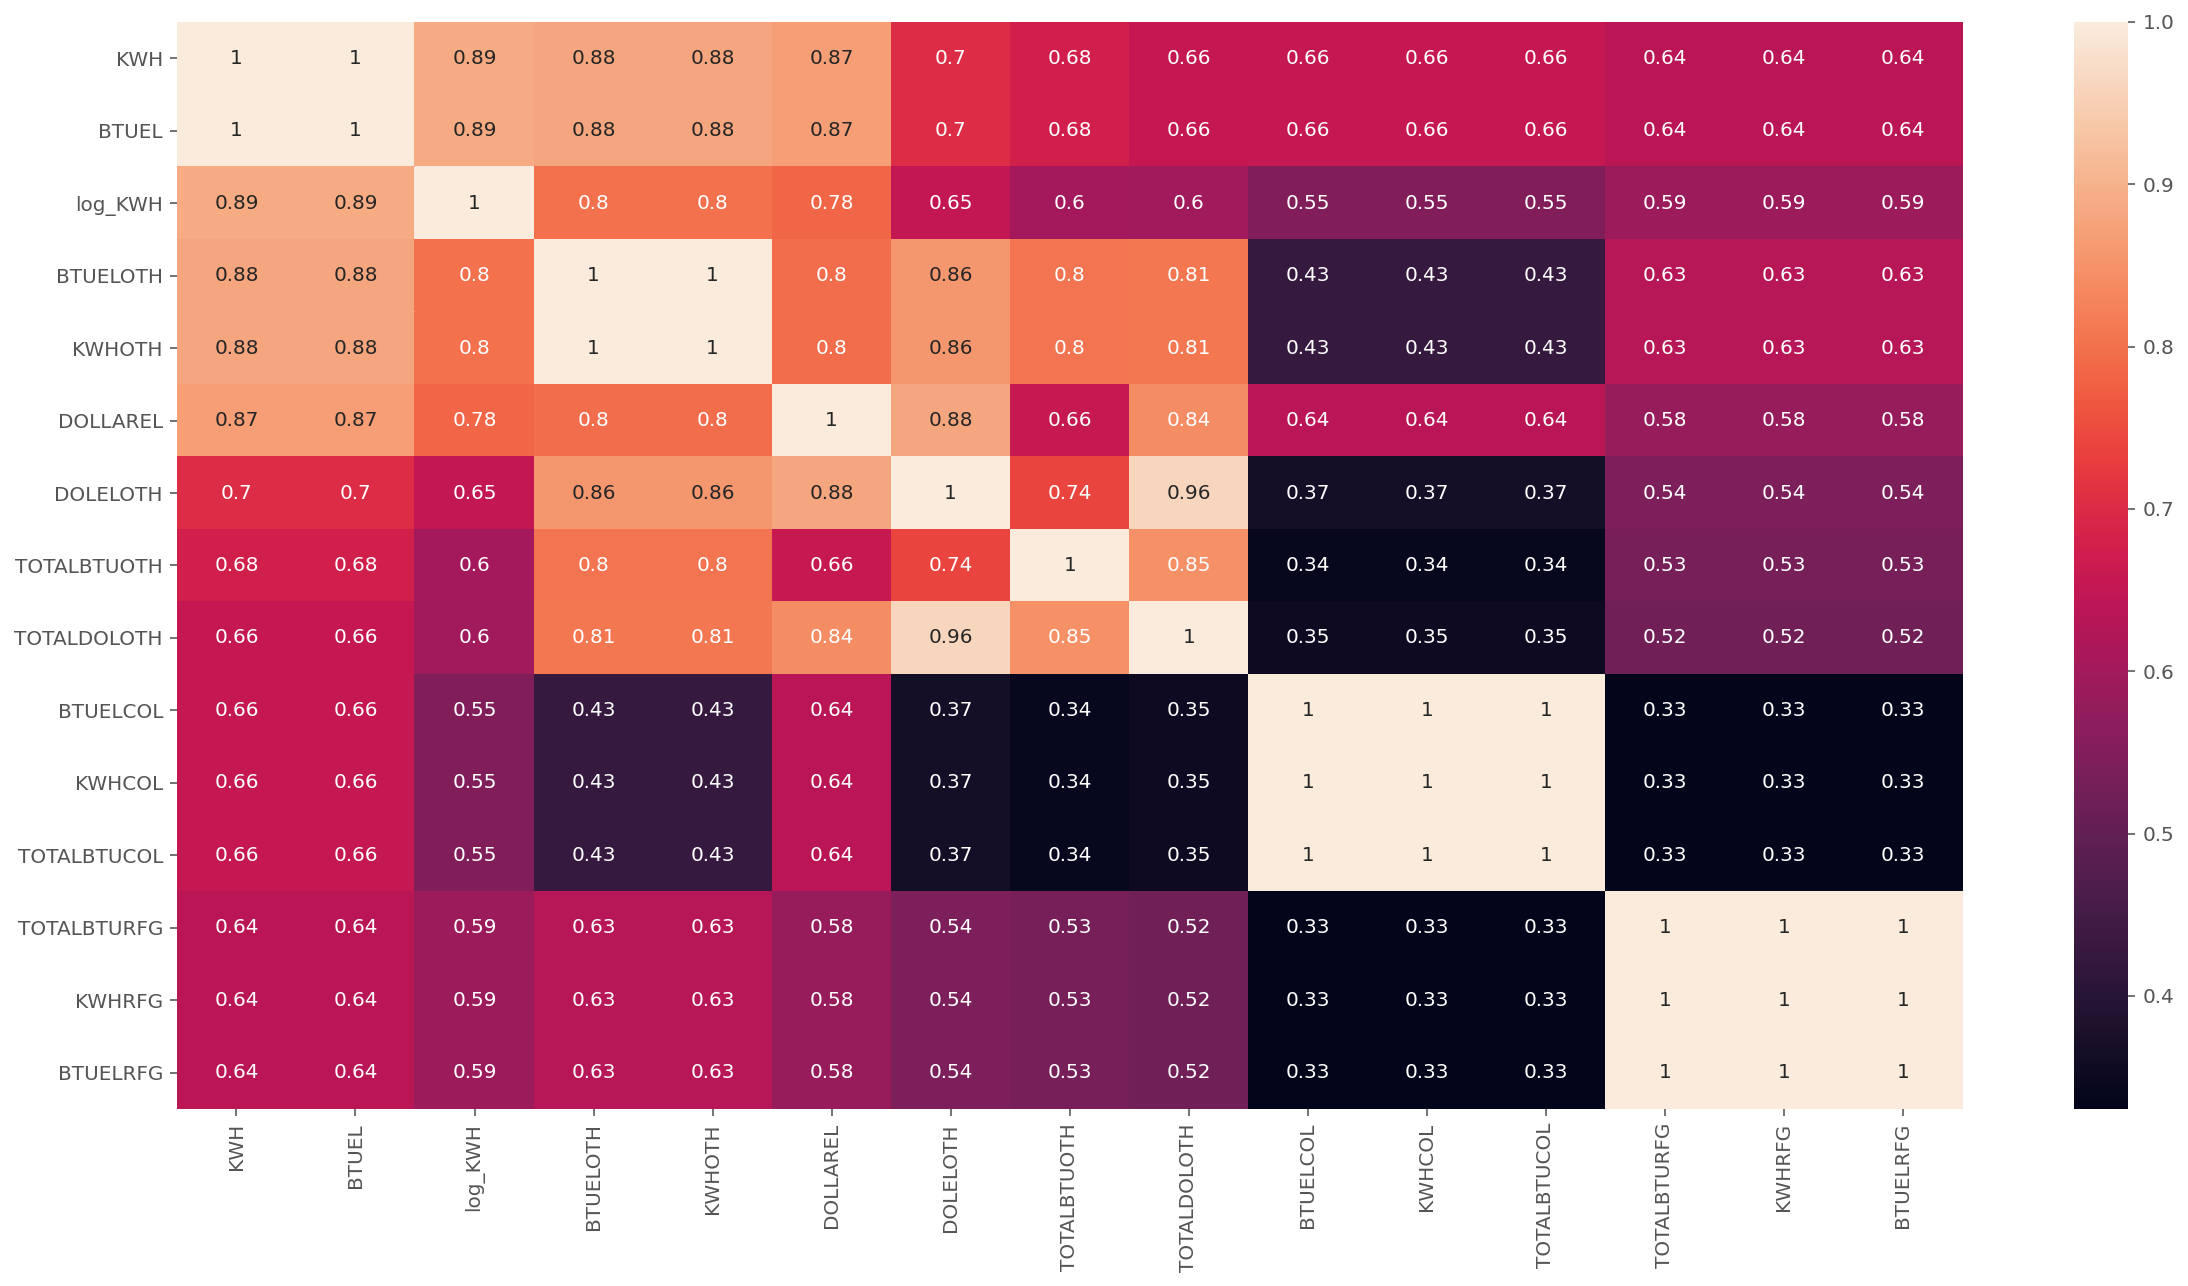

In [22]:
# plot heatmap of the corr_significant
plt.figure(figsize = (20,10))
heatmap = sns.heatmap(data[res.index].corr(), annot = True)

As you can see, there are some highly correlated features with the log_KWH.

<a id='6'></a>
## 6. Missing data and label encoding


<a id='61'></a>
### A. Completeness of the data

First of all, I would like to see which variables contain missing values.

In [23]:
data.isnull().sum().sum()

0

Great news. No missing values.

<a id='62'></a>
### B. Label encoding

In [24]:
# selecting X and y
y = data.KWH 
X = data.drop('KWH', axis=1)

In [25]:
# Label encoder
for c in data.columns[data.dtypes == 'object']:
    X[c] = X[c].factorize()[0] ##using factorization the result will have 1 dimension

In [26]:
# The isinstance() function returns True if the specified object is of the specified type, otherwise False.
isinstance(X, np.ndarray)

False

<a id='7'></a>
## 7. Visualization of important variables

<a id='71'></a>
### A. Finding variable importance with a quick XGBRegressor


Although the correlations are giving a good overview of the most important numeric variables and multicolinerity among those variables, I wanted to get an overview of the most important variables including the categorical variables before moving on to visualization.

In [27]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

Features importance done


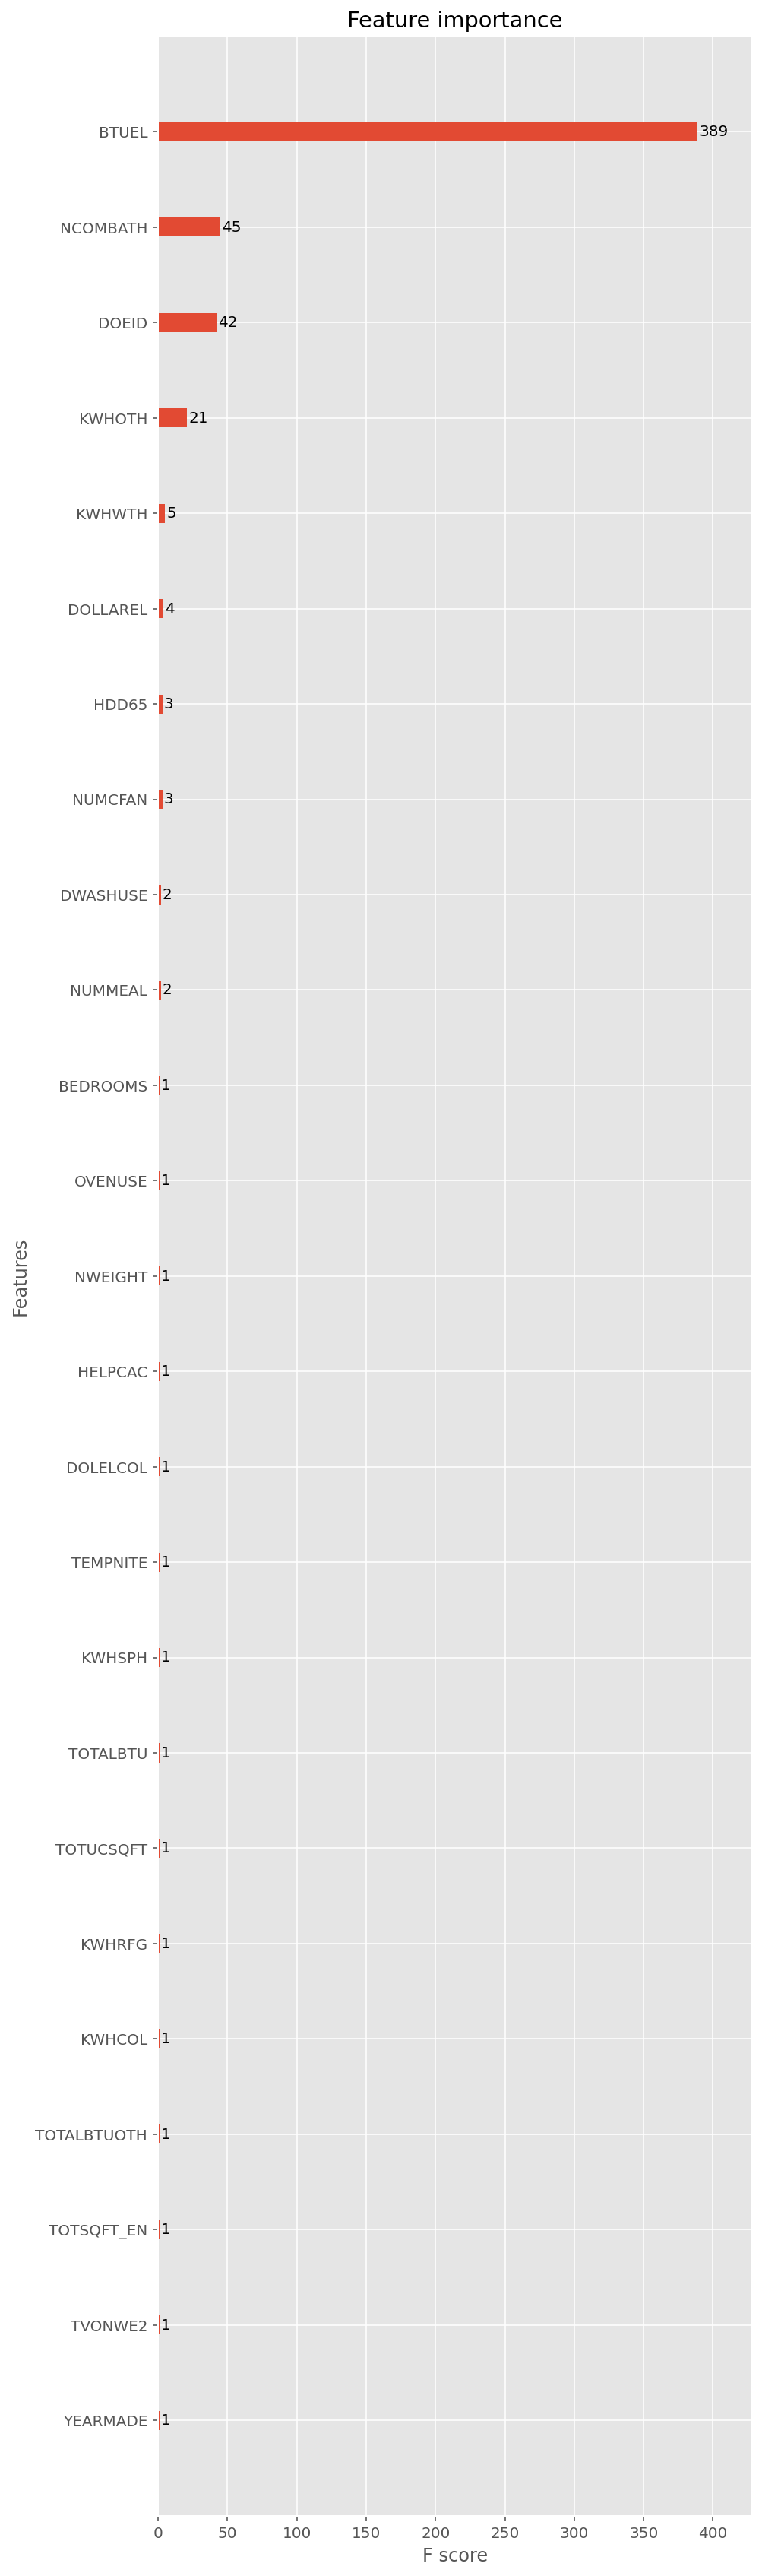

In [28]:
fig, ax = plt.subplots(figsize=(7, 30))
xgb.plot_importance(model, ax=ax)
print("Features importance done")

Looking at feature importances using XGBRegressor method, we can see that as expected, the plot suggests that there are some features that are very informative, while the remaining are not.<br>

Also, the first feature "BTUEL" is directly express the label KWH, and I will drop this feature later for the modeling. 

### Categorical Variables

Now lets check our categorical features. 

In [29]:
print(data.shape)
print('*'*35)
n = data.select_dtypes(include=object)
for column in n.columns:
    print(column, ':  ', data[column].unique())

(12083, 941)
***********************************
METROMICRO :   ['METRO' 'MICRO' 'NONE']
UR :   ['U' 'R']
NOCRCASH :   [-2 1 6 15 4 '-2' '1' '20' '.' '12' '4' '10' '3' '24' '55' '6' 8 28 5 55 3
 16 2 20 10 24 40 12 25]
NKRGALNC :   [-2 1 5 10 '-2' '10' '15' '1' '8' '.' '5' '3' '2' '77' 30 3 15 8 55 2 20]
IECC_Climate_Pub :   ['4A' '3C' '5A' '6A-6B' '1A-2A' '3B-4B' '3A' '5B-5C' '7A-7B-7AK-8AK' '2B'
 '4C']


We can see here each categorical variable and their related instances.<br>

Next, we are going to check the distribution of each instances for each categorical variable.

In [30]:
## Let's see the distribuition of the categories: 
for category in list(categorical_feats):
    print('#'*35)    
    print('Distribuition of feature:', category)
    print(data[category].value_counts(normalize=True))
    print('#'*35)

###################################
Distribuition of feature: METROMICRO
METRO    0.852602830422908
MICRO    0.091781842257717
NONE     0.055615327319374
Name: METROMICRO, dtype: float64
###################################
###################################
Distribuition of feature: UR
U    0.79913928660101
R    0.20086071339899
Name: UR, dtype: float64
###################################
###################################
Distribuition of feature: NOCRCASH
-2    0.824133079533228
-2    0.167839112803112
1     0.001489696267483
3     0.000827609037491
4     0.000827609037491
5     0.000744848133742
2     0.000579326326243
1     0.000496565422494
16    0.000331043614996
12    0.000248282711247
6     0.000248282711247
8     0.000248282711247
.     0.000165521807498
12    0.000165521807498
15    0.000165521807498
24    0.000165521807498
55    0.000165521807498
3     0.000165521807498
4     0.000165521807498
6     0.000082760903749
20    0.000082760903749
25    0.000082760903749
55    0.

### The target feature (KWH) and categorical features

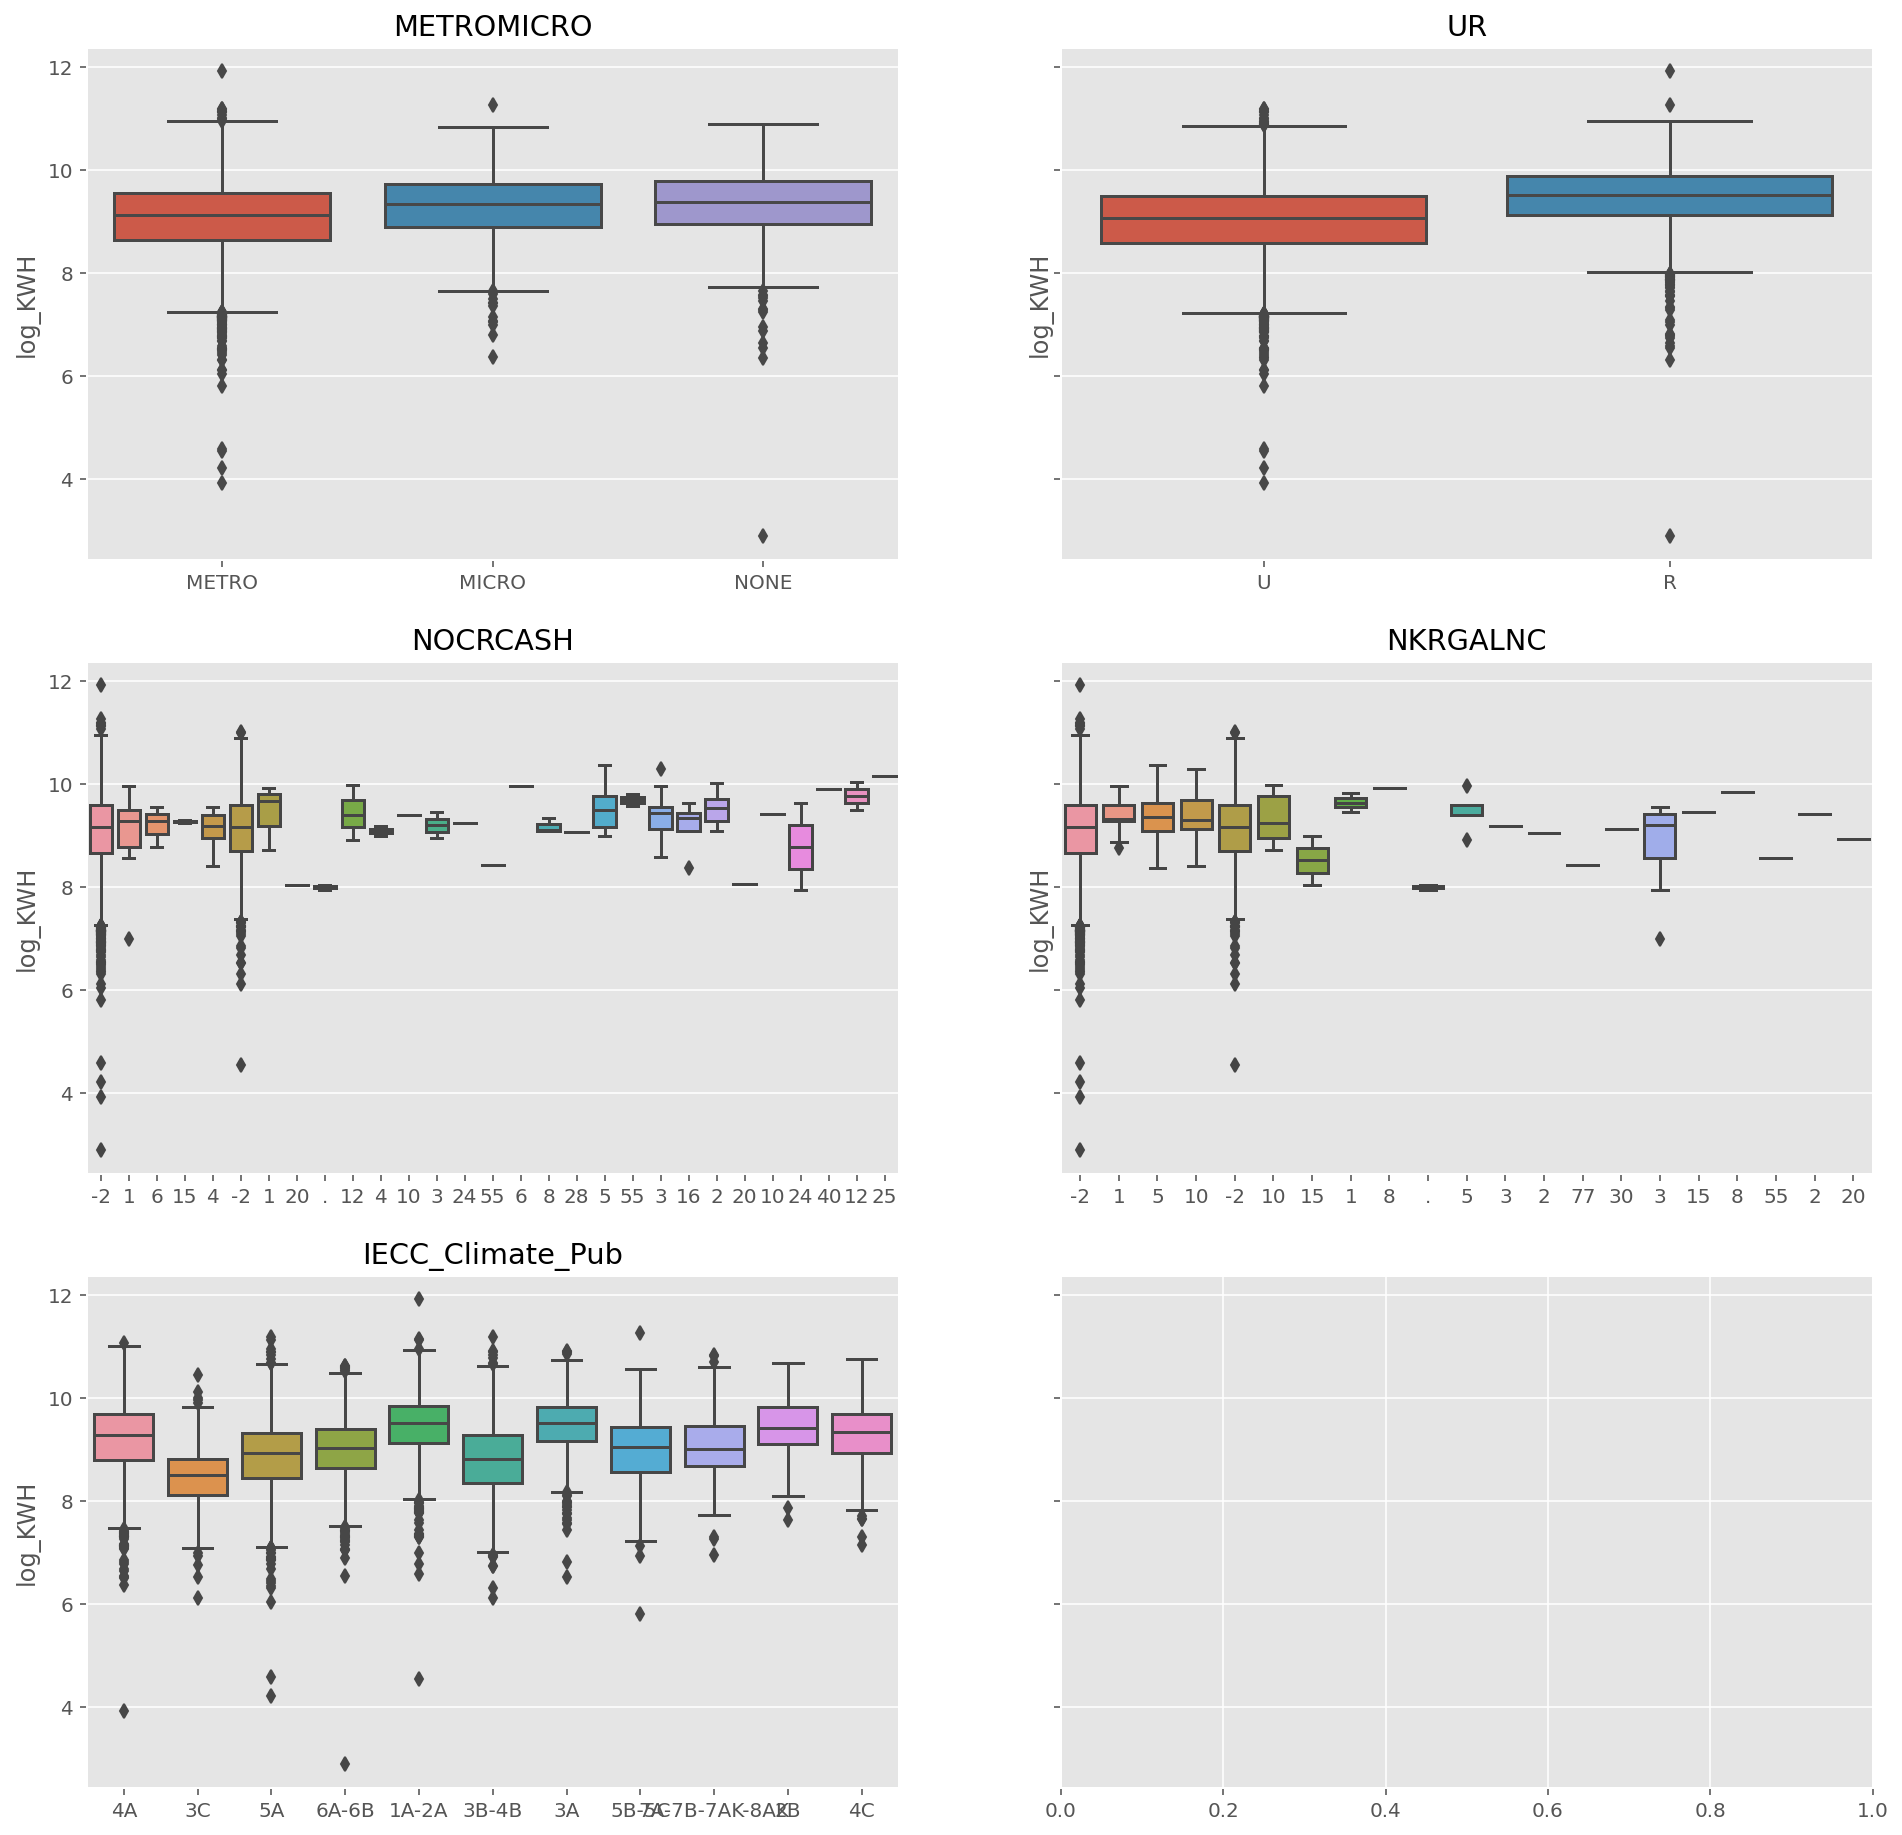

In [31]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(4 * 4, 4 * 4), sharey=True)

axes = np.ravel(axes) #which is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array.

cols = ['METROMICRO','UR','NOCRCASH','NKRGALNC','IECC_Climate_Pub']

for i, c in zip(np.arange(len(axes)), cols):
    ax = sns.boxplot(x=c, y='log_KWH', data=data, ax=axes[i])
    ax.set_title(c)
    ax.set_xlabel("")

We can see from the box plot that most of the features use less than 80000 KWH (12 in the plot because I transformed KWH to log_KWH) of electricity.  However, we have an unusual outlier (arount 12 log_KWH). I'm going to check this outlier and remove it later. 

<a id="72"></a>
### B. Construction material and energy consumption

Construction Materials:

As I mentioned earlier, I would like to know will using different construction materials such as roof type, wall type, and glass type have any impact on the energy consumption?

<img src="https://abzarbaloot.com/blog/wp-content/uploads/2019/07/Building-Materials.jpg" width="500" height="250">

I will visualise the count of each material in this section, as well as their effect on energy consumption.<br>

### Roof type frequency and energy consumption

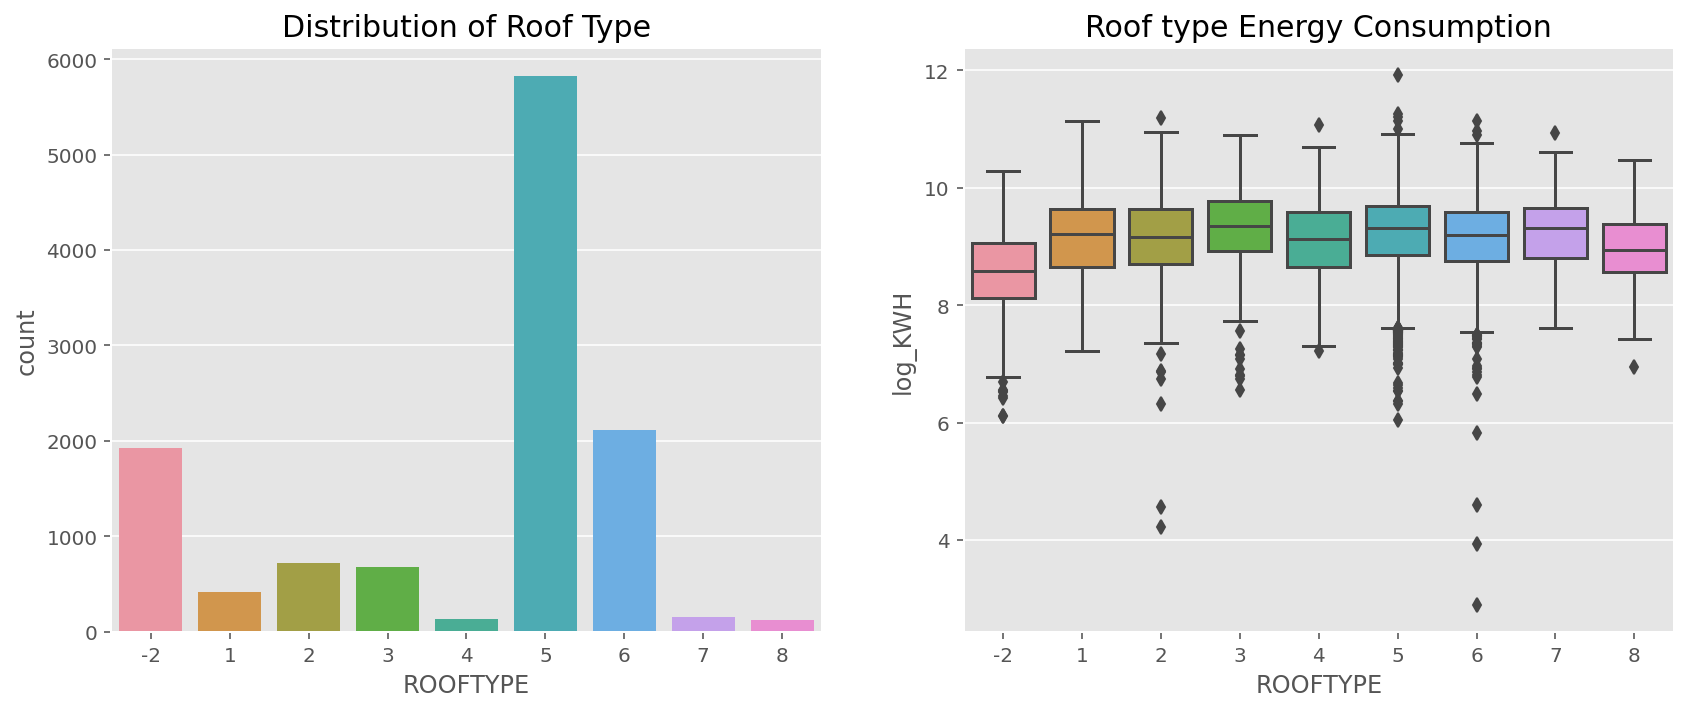

In [32]:
plt.figure(figsize=(14,6))
#I will explore the distribution of Roof type and roof type by log_KWH
plt.subplot(121)
ax_roof = sns.countplot(x='ROOFTYPE', data=data)
ax_roof.set_title("Distribution of Roof Type", fontsize=15)


plt.subplot(122)
ax_roof = sns.boxplot(x ="ROOFTYPE",y="log_KWH", data=data)
ax_roof.set_title("Roof type Energy Consumption", fontsize=15)


plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

Based on the distribution of each material:

**Roof type:** material 5,6, and -2 had been used the most in constructing the house roof which are 'Composition Shingles', 'Asphalt', and 'Not Applicable' respectively. <br>

**Roof type Energy Consumption:** Based on the box plot, the most energy consumption roofs in terms of log_KWH are roof type 3, 5, and 7 respectively. 

### Wall type frequency and energy consumption

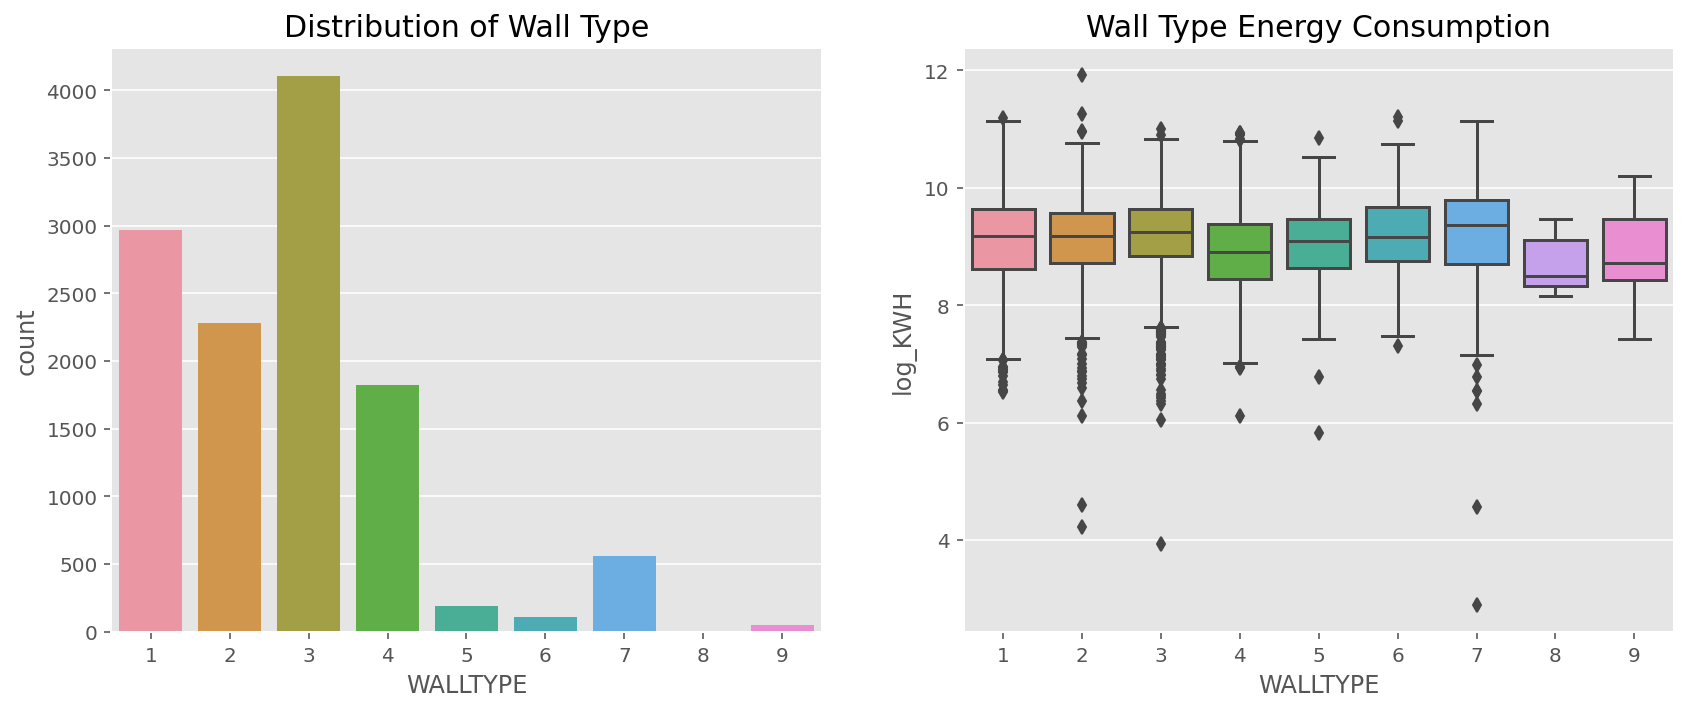

In [33]:
plt.figure(figsize=(14,6))
#I will explore the distribution of wall type and wall type by log_KWH
plt.subplot(121)
ax_wall = sns.countplot(x='WALLTYPE', data=data)
ax_wall.set_title("Distribution of Wall Type", fontsize=15)


plt.subplot(122)
ax_wall = sns.boxplot(x ="WALLTYPE",y="log_KWH", data=data)
ax_wall.set_title("Wall Type Energy Consumption", fontsize=15)


plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

**Wall type:** material 3,1, and 2 had been used the most in constructing the houses walls which are 'Siding (Aluminum, Vinyl, Steel)','Brick', and 'Wood' respectively. <br>

**Roof type Energy Consumption:** Based on the box plot, the most energy consumption walls in terms of log_KWH are wall type 7, 6, and 3 respectively. 

### Glass type frequency and energy consumption

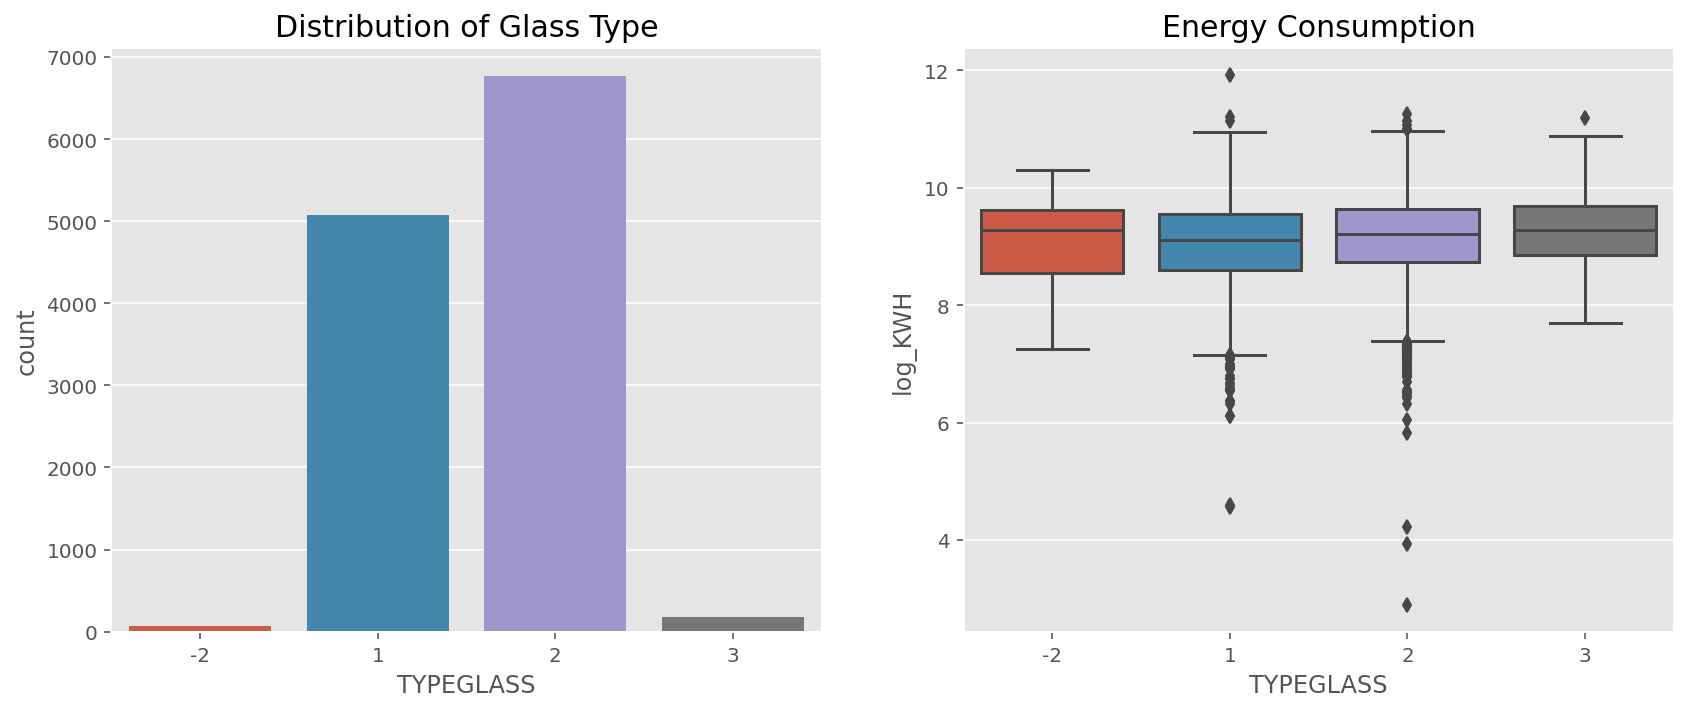

In [34]:
plt.figure(figsize=(14,6))
#I will explore the distribution of Glass type and Glass type by log_KWH
plt.subplot(121)
ax_glass = sns.countplot(x='TYPEGLASS', data=data)
ax_glass.set_title("Distribution of Glass Type", fontsize=15)


plt.subplot(122)
ax_glass = sns.boxplot(x ="TYPEGLASS",y="log_KWH", data=data)
ax_glass.set_title("Energy Consumption", fontsize=15)


plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

**Glass type:** material 2 and 1 had been used the most in constructing the houses glass which are 'Double-pane glass' and 'Single-pane glass' respectively. <br>

**Roof type Energy Consumption:** Based on the box plot, the most energy consumption Glass in terms of log_KWH are Glass type 2, and 1 respectively.

<a id='73'></a>
### C. Household information and energy consumption

Here, I would like to answer the following questions: 

1- Is there an energy consumption pattern that is based on the year the house was built?<br>

2- Does the number of household members and the age of household members have an impact on energy consumption?<br>

<img src="https://blogadmin.planning.center/content/images/2020/06/2020-new-household-form.png" width="500" height="250">

#### Year Made frequency and energy consumption

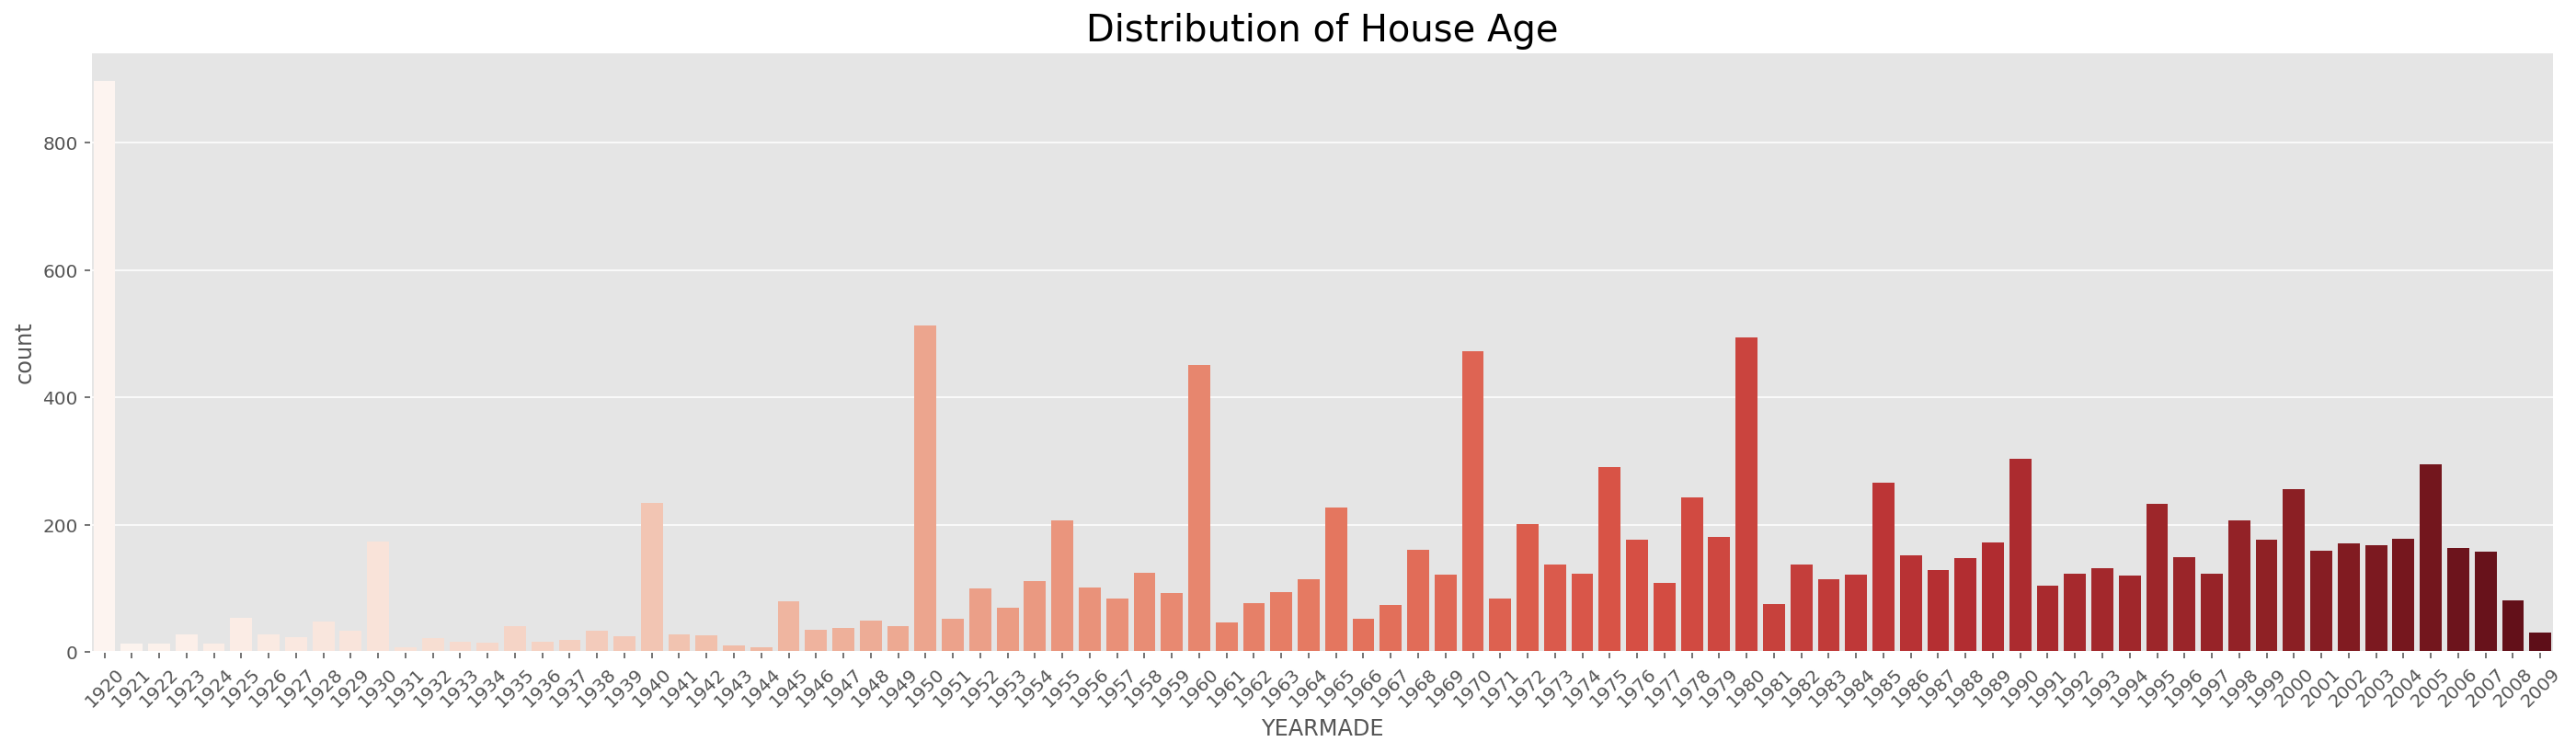

In [35]:
plt.figure(figsize=(24,6))
ax_year = sns.countplot(x='YEARMADE', data=data, palette='Reds')
ax_year.set_title("Distribution of House Age", fontsize=20)
ax_year.set_xticklabels(ax_year.get_xticklabels(), rotation=45);

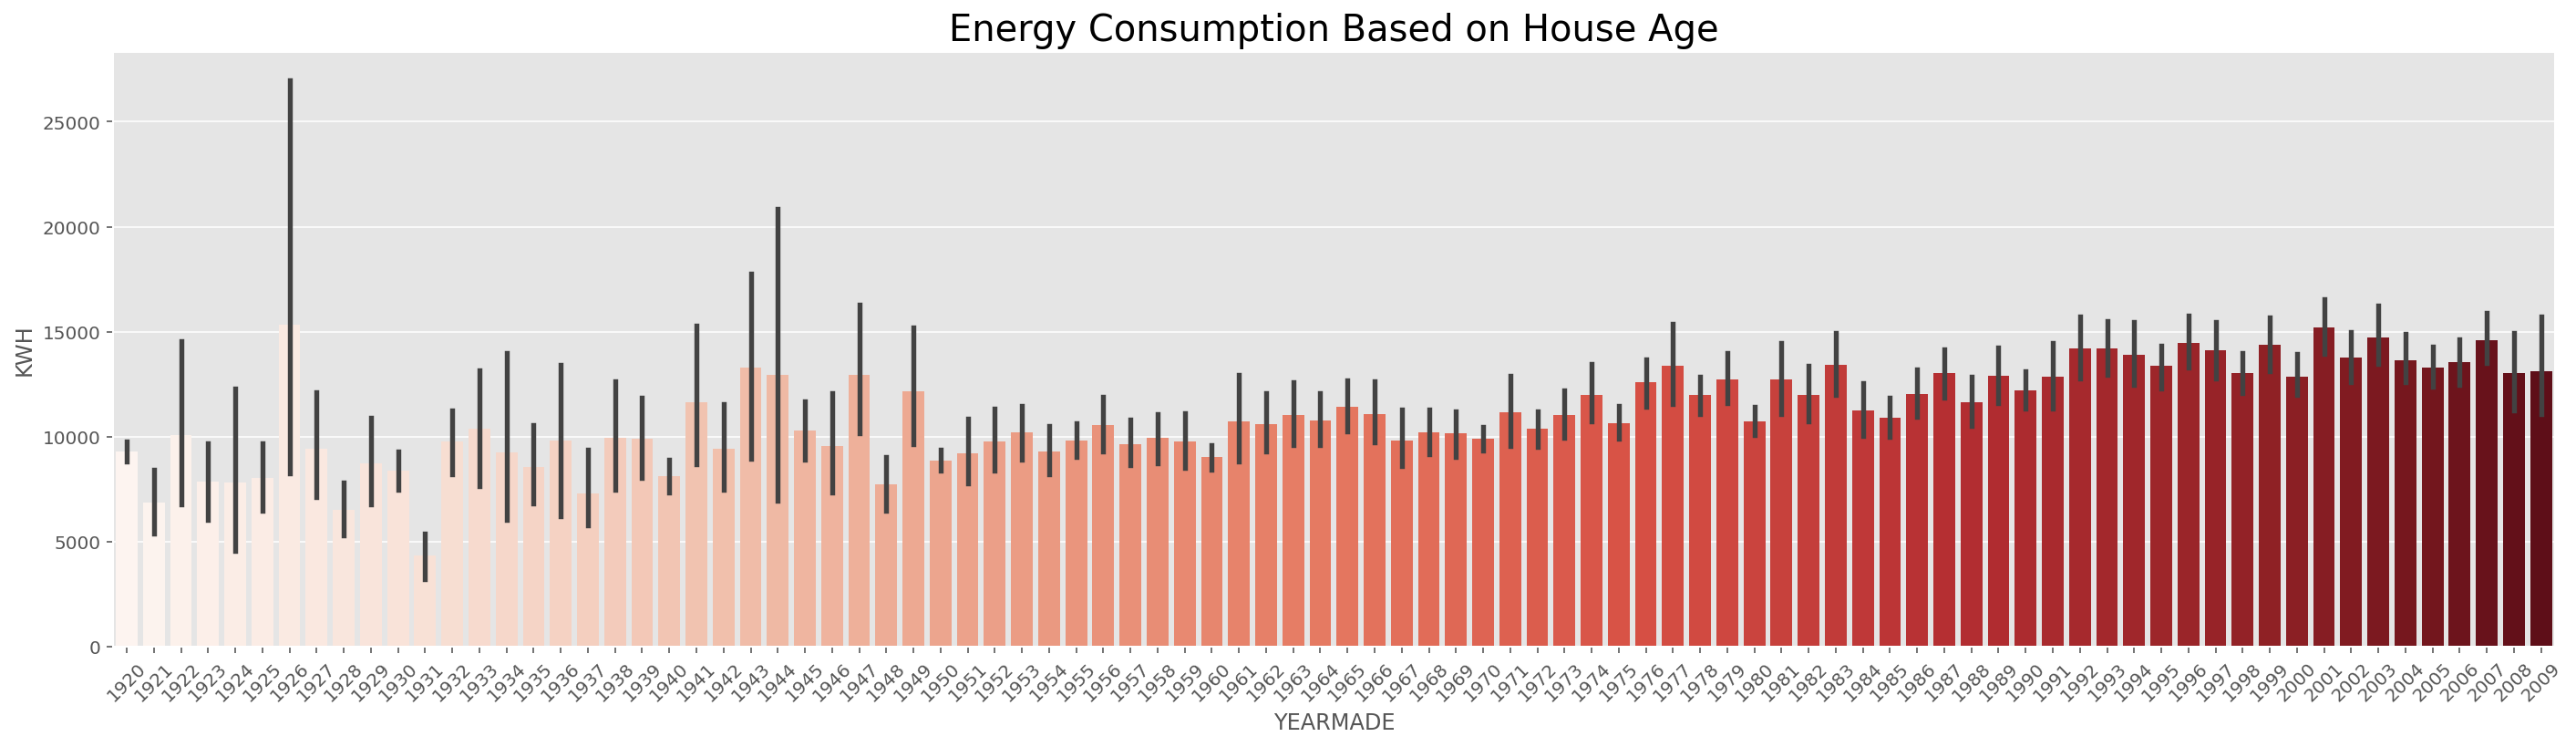

In [36]:
plt.figure(figsize=(24,6))
ax_year = sns.barplot(x ="YEARMADE",y="KWH", data=data, palette='Reds')
ax_year.set_title("Energy Consumption Based on House Age", fontsize=20);
ax_year.set_xticklabels(ax_year.get_xticklabels(), rotation=45);

The bar plot above doesn't show almost any difference in energy consumption based on the age of the house. It seems that modern and old houses use almost the same amount of energy.

#### Age of Household Members frequency and energy consumption

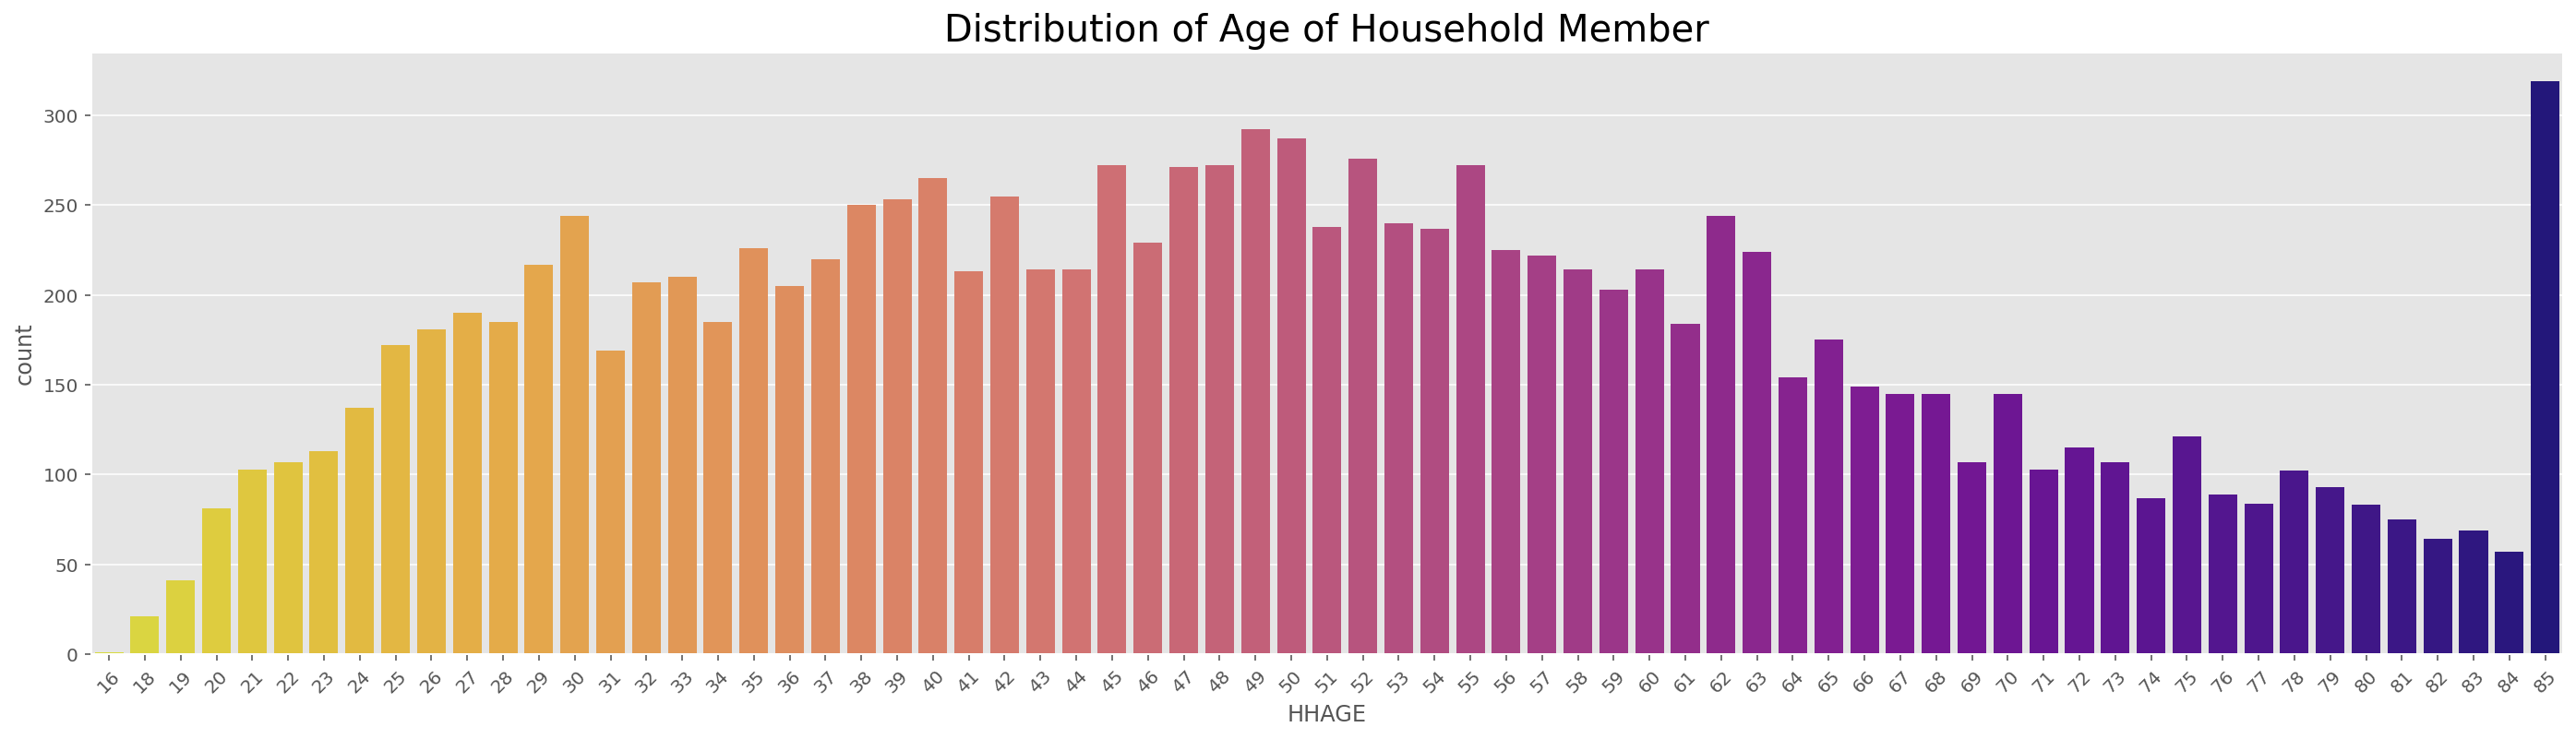

In [37]:
plt.figure(figsize=(24,6))
#ax_HM shows the Age of Household member (HM Stands for  Household member)
ax_age = sns.countplot(x='HHAGE', data=data, palette='plasma_r')
ax_age.set_title("Distribution of Age of Household Member", fontsize=20)
ax_age.set_xticklabels(ax_age.get_xticklabels(), rotation=45);

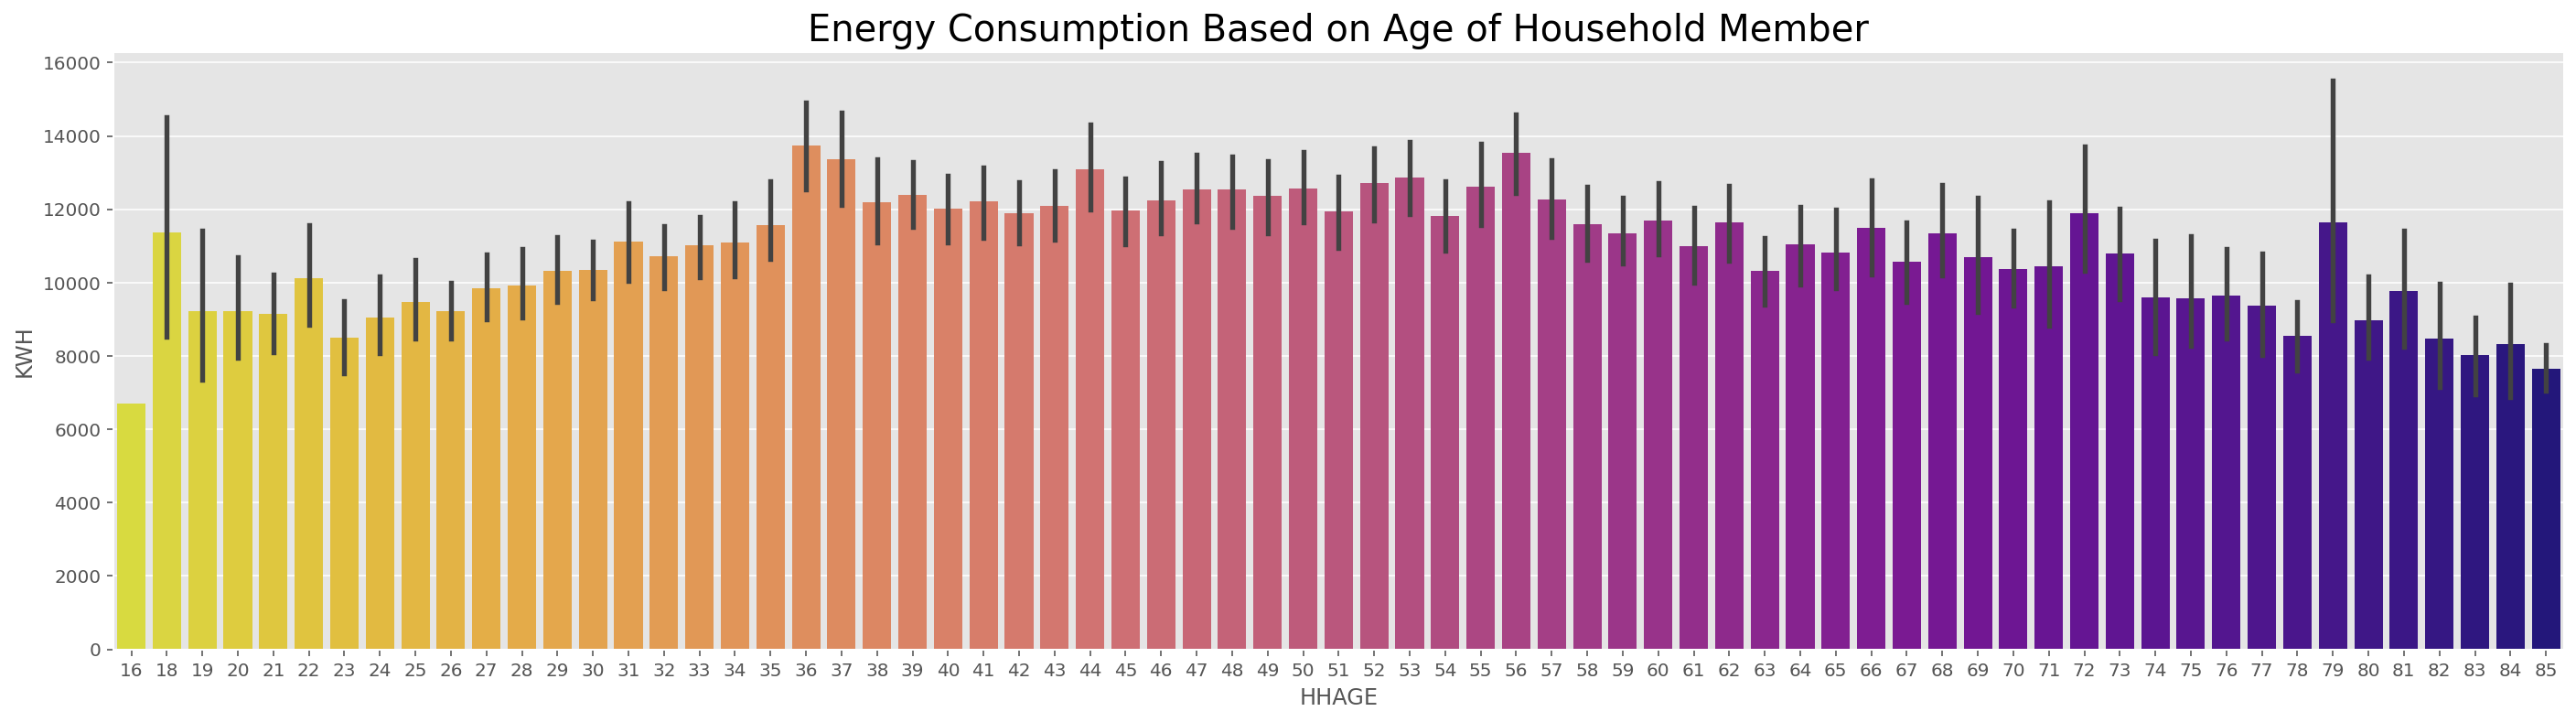

In [38]:
plt.figure(figsize=(24,6))
ax_age = sns.barplot(x ="HHAGE",y="KWH", data=data, palette='plasma_r')
ax_age.set_title("Energy Consumption Based on Age of Household Member", fontsize=20);

Once again, looking at the age of the members of the household, we can not find a clear pattern of how age can impact energy consumption.

####  Number of Household Members frequency and energy consumption

Text(0.5, 1.0, 'Distribution of Number of Household Member')

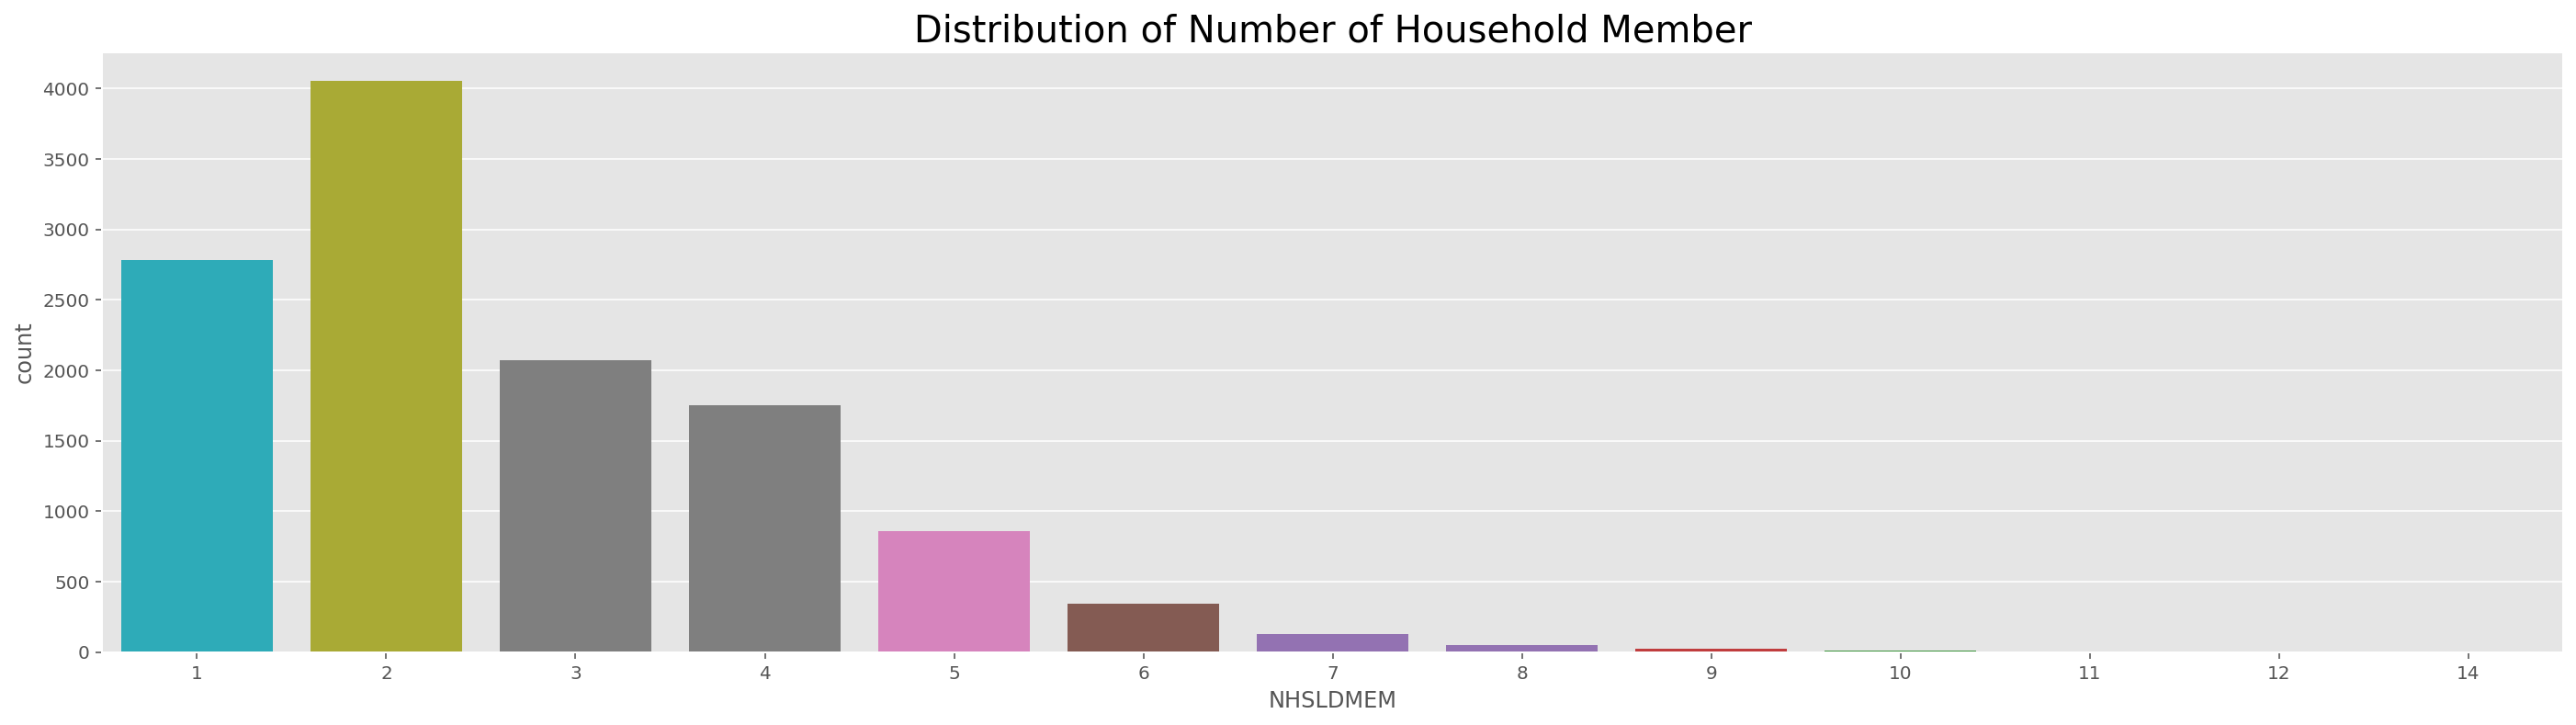

In [39]:
plt.figure(figsize=(24,6))
ax_num = sns.countplot(x='NHSLDMEM', data=data, palette='tab10_r')
ax_num.set_title("Distribution of Number of Household Member", fontsize=20)

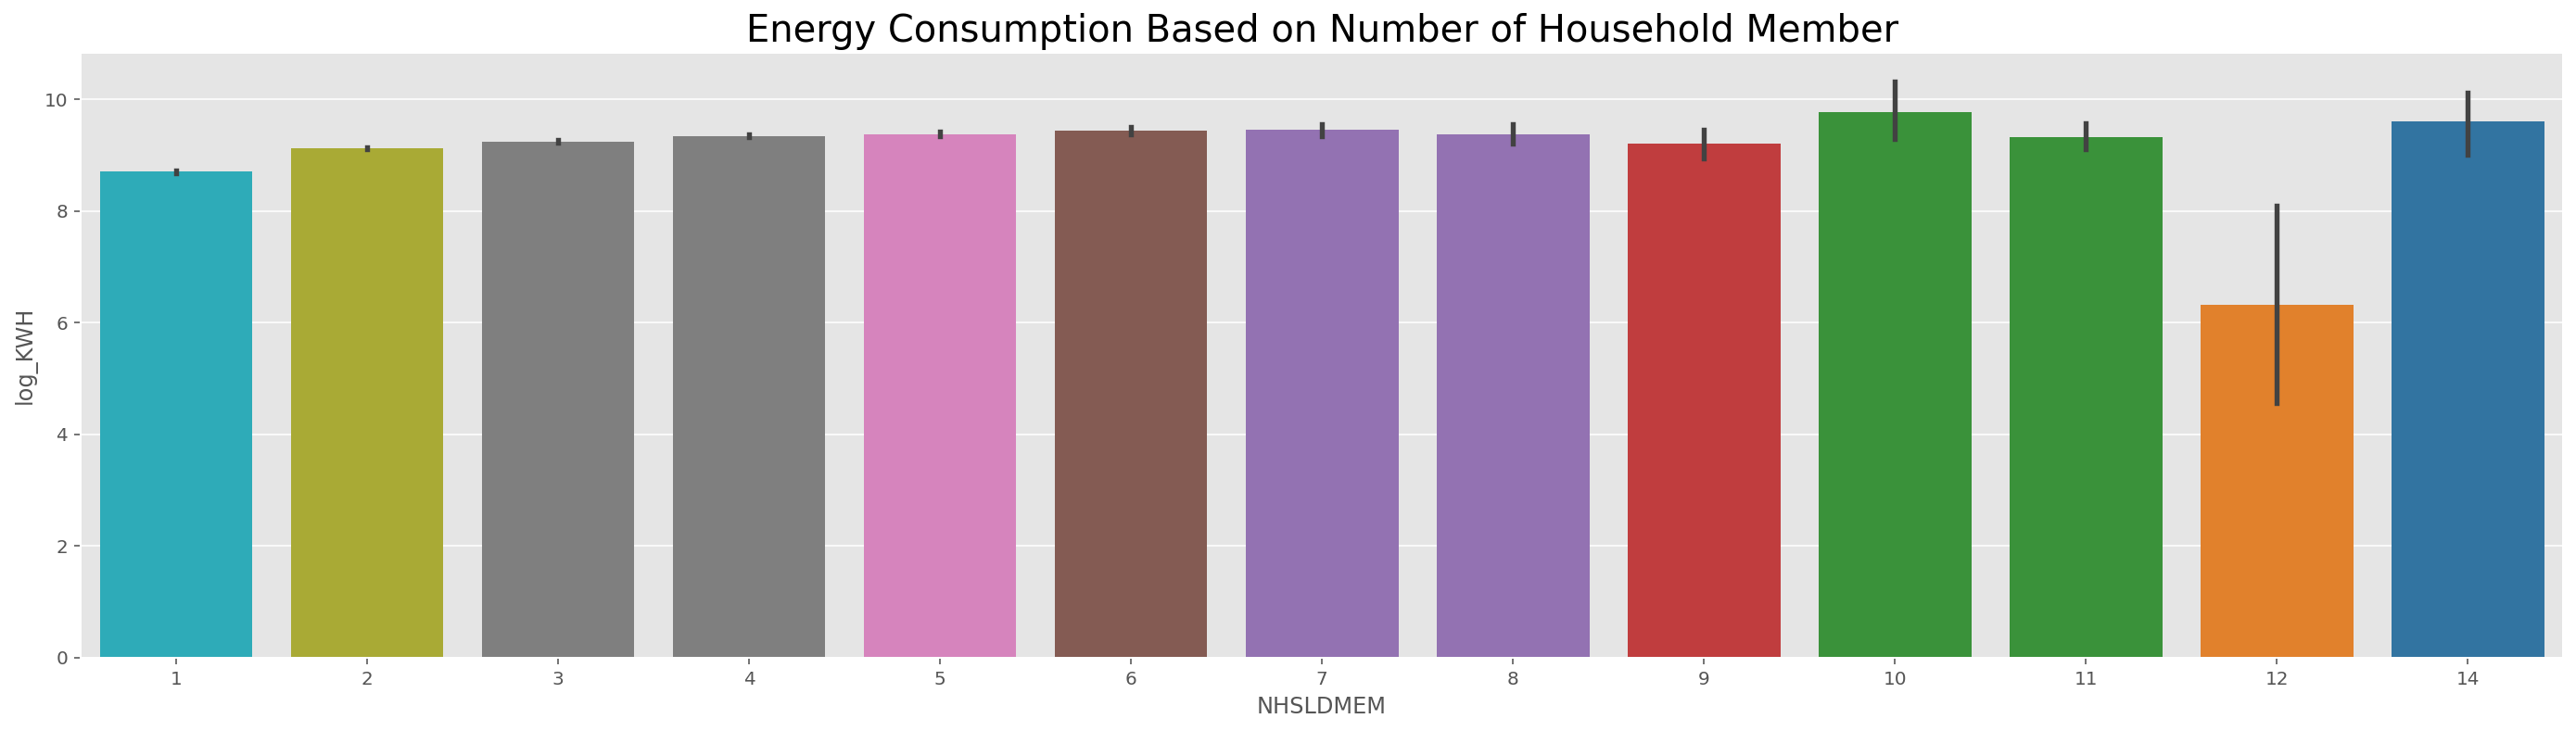

In [40]:
plt.figure(figsize=(24,6))
ax_num = sns.barplot(x ="NHSLDMEM",y="log_KWH", data=data, palette='tab10_r')
ax_num.set_title("Energy Consumption Based on Number of Household Member", fontsize=20);

Again, looking at the number of the members of the household, we can not find a clear pattern of how number of households can impact energy consumption.

<a id='74'></a>
### C. Kitchen appliances and energy consumption

Here, I would like to answer the following question using visualization:<br>

How can kitchen appliances like dishwasher, microwave and oven make a difference on energy consumption?<br>

<img src="https://www.parsgraphic.ir/assets/source/images/vector-images16/572.jpg" width="500" height="250">

In this section, I will visualise the count of the frequency of use of each of the above mentioned kitchen appliances, as well as their effect on energy consumption.

#### Dishwasher Use 

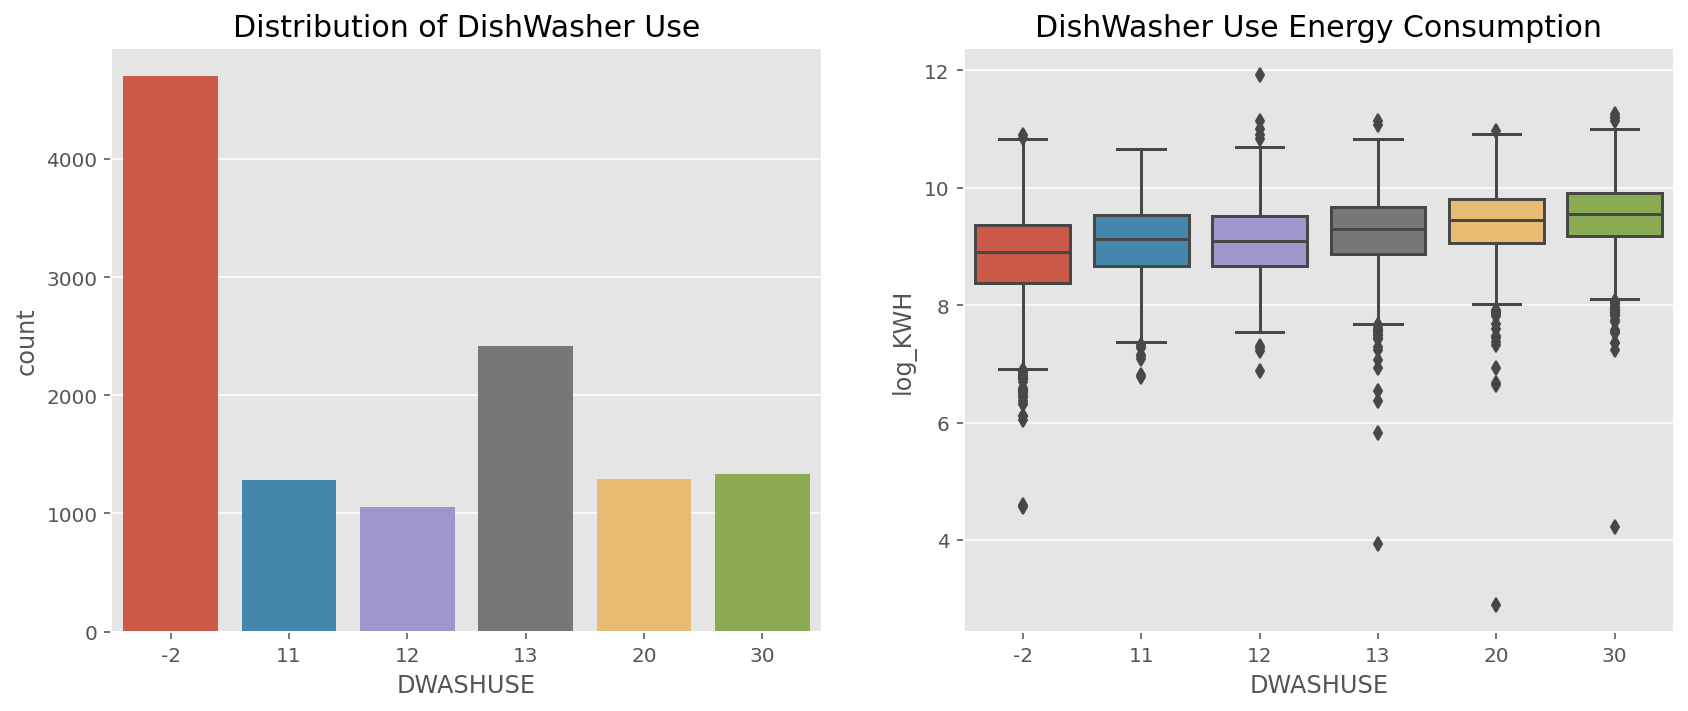

In [41]:
plt.figure(figsize=(14,6))
#I will explore the distribution of wall type and wall type by log_KWH
plt.subplot(121)
ax_dishwasher = sns.countplot(x='DWASHUSE', data=data)
ax_dishwasher.set_title("Distribution of DishWasher Use", fontsize=15)


plt.subplot(122)
ax_dishwasher = sns.boxplot(x ="DWASHUSE",y="log_KWH", data=data)
ax_dishwasher.set_title("DishWasher Use Energy Consumption", fontsize=15)


plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

Based on the barplot above, most of the householders use dishwasher 2 or 3 times per week (13). Also, bar -2 shows that the dishwasher use is not applicable most of the times.<br>

On the other side, we can see a clear pattern based on the boxplot, that the more you use your dishwasher, the more energy is consumed. Maybe because most of the dishwasher uses hot water for at least 40 minutes which consumes a lot of power. Number 30 indicates at least once per day they used their dishwasher.


#### Microwave Use

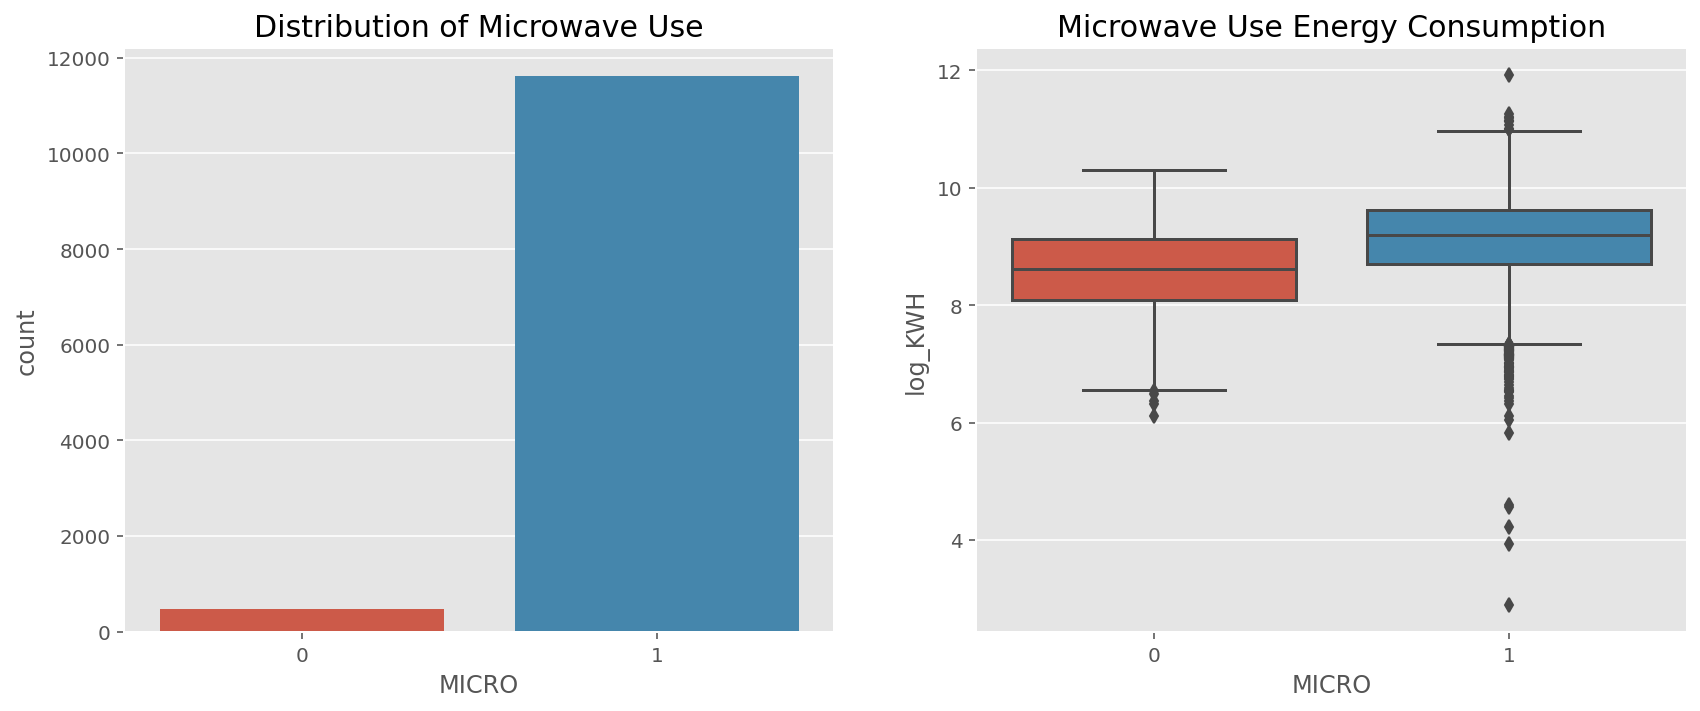

In [42]:
plt.figure(figsize=(14,6))
#I will explore the distribution of wall type and wall type by log_KWH
plt.subplot(121)
ax_microwave = sns.countplot(x='MICRO', data=data)
ax_microwave.set_title("Distribution of Microwave Use", fontsize=15)


plt.subplot(122)
ax_microwave = sns.boxplot(x ="MICRO",y="log_KWH", data=data)
ax_microwave.set_title("Microwave Use Energy Consumption", fontsize=15)


plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

Most hoseholders use Microwave in their homes and we can see that there was a higher energy consumption for users with microwave.

#### Oven Use 

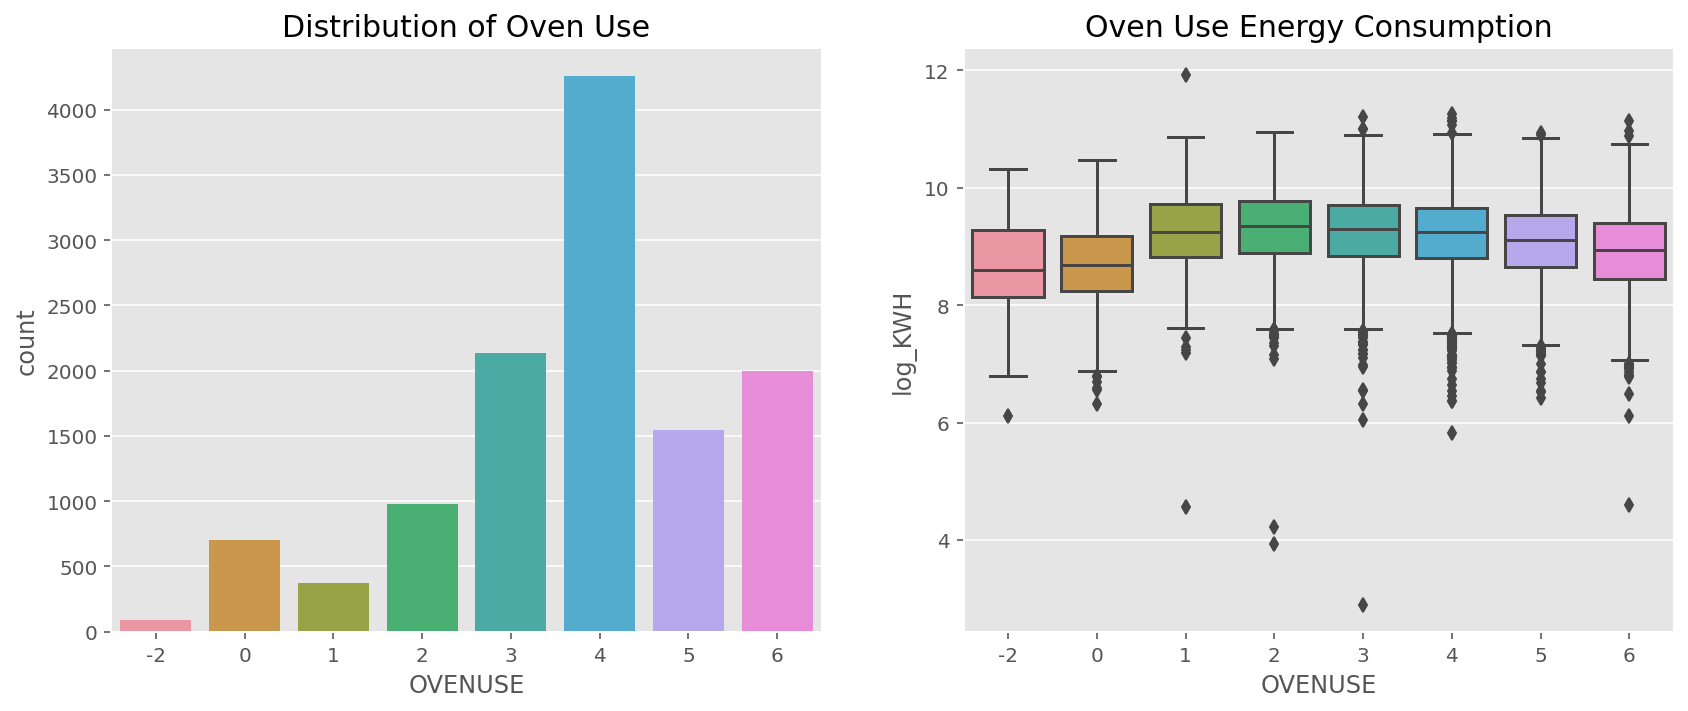

In [43]:
plt.figure(figsize=(14,6))
#I will explore the distribution of wall type and wall type by log_KWH
plt.subplot(121)
ax_oven = sns.countplot(x='OVENUSE', data=data)
ax_oven.set_title("Distribution of Oven Use", fontsize=15)


plt.subplot(122)
ax_oven = sns.boxplot(x ="OVENUSE",y="log_KWH", data=data)
ax_oven.set_title("Oven Use Energy Consumption", fontsize=15)


plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

We can see in this bar plot that the majority of users use their oven a few times per week (4). <br>

On the other hand, the most energy consumed by the user who used their oven twice a day (2) which is another pattern we came up with on the basis of this data visualization.

<a id='75'></a>
### E. House information and energy consumption

Here, I would like to answer the following question using visualization:<br>

How does the size of the house, the number of bedrooms and bathrooms, and a having a pool will impact energy consumption?

<img src="https://image.freepik.com/free-vector/modern-house-villa-exterior-with-swimming-pool-backyard-illustration_7081-1626.jpg" width="500" height="250">


### Number of Complete Bathrooms 

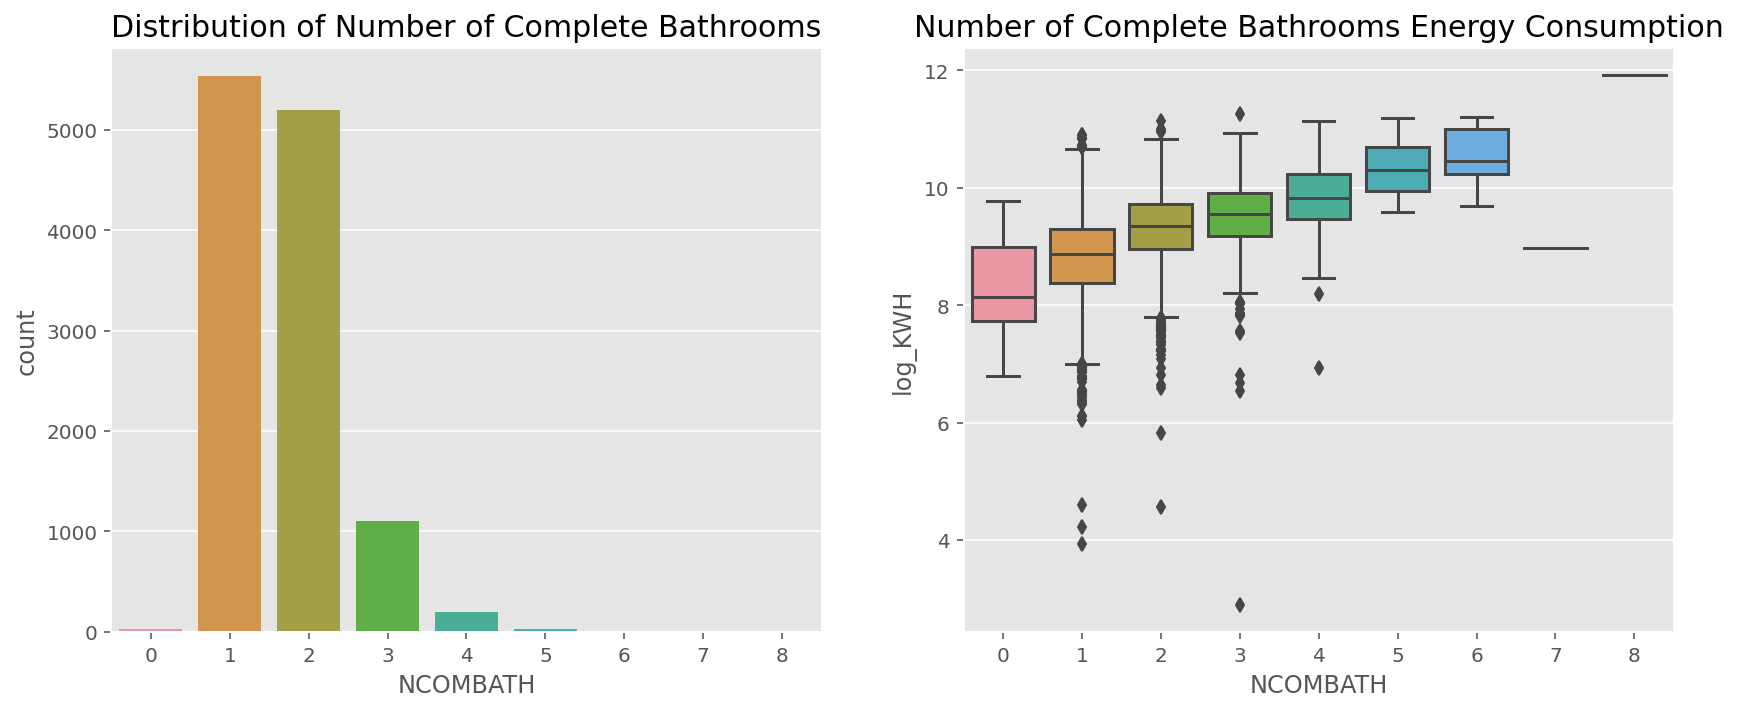

In [44]:
plt.figure(figsize=(14,6))
#I will explore the distribution of wall type and wall type by log_KWH
plt.subplot(121)
ax_bath = sns.countplot(x='NCOMBATH', data=data)
ax_bath.set_title("Distribution of Number of Complete Bathrooms", fontsize=15)


plt.subplot(122)
ax_bath = sns.boxplot(x ="NCOMBATH",y="log_KWH", data=data)
ax_bath.set_title("Number of Complete Bathrooms Energy Consumption", fontsize=15)


plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

Most of the houses have one and two complete bathrooms.

We can see a very nice and clear pattern on the box plot that indicates houses with more bathrooms are consuming more electricity. 

### Number of Bedrooms

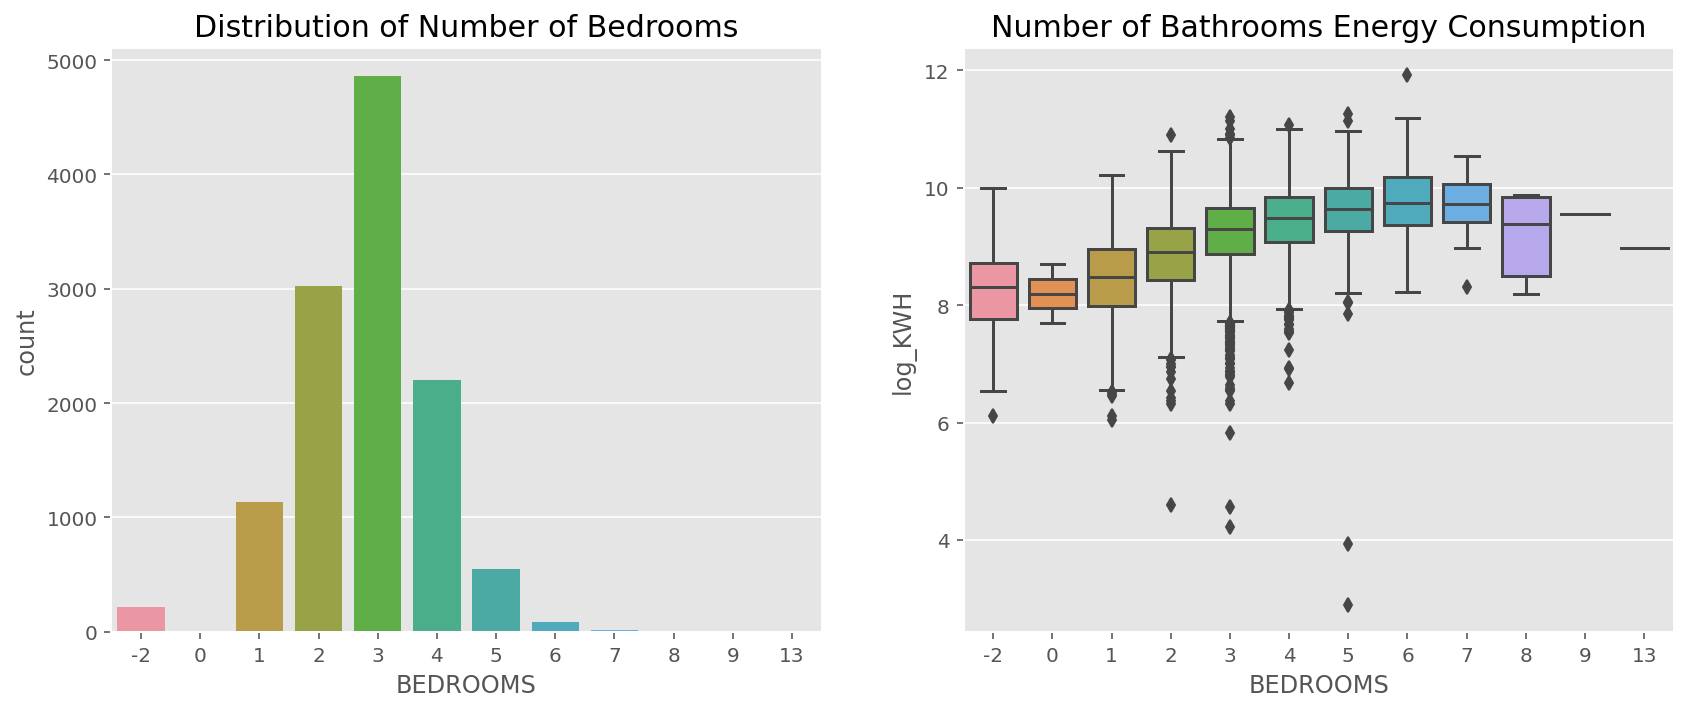

In [45]:
plt.figure(figsize=(14,6))
#I will explore the distribution of wall type and wall type by log_KWH
plt.subplot(121)
ax_bedroom = sns.countplot(x='BEDROOMS', data=data)
ax_bedroom.set_title("Distribution of Number of Bedrooms", fontsize=15)


plt.subplot(122)
ax_bedroom = sns.boxplot(x ="BEDROOMS",y="log_KWH", data=data)
ax_bedroom.set_title("Number of Bathrooms Energy Consumption", fontsize=15)


plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

Most of the houses have two or three number of bedrooms.

Again, like previous step (number of bathrooms) we can see a very nice and clear pattern on the box plot that indicates houses with more bedrooms are consuming more electricity.

### POOL: Yes, No, Not Applicable

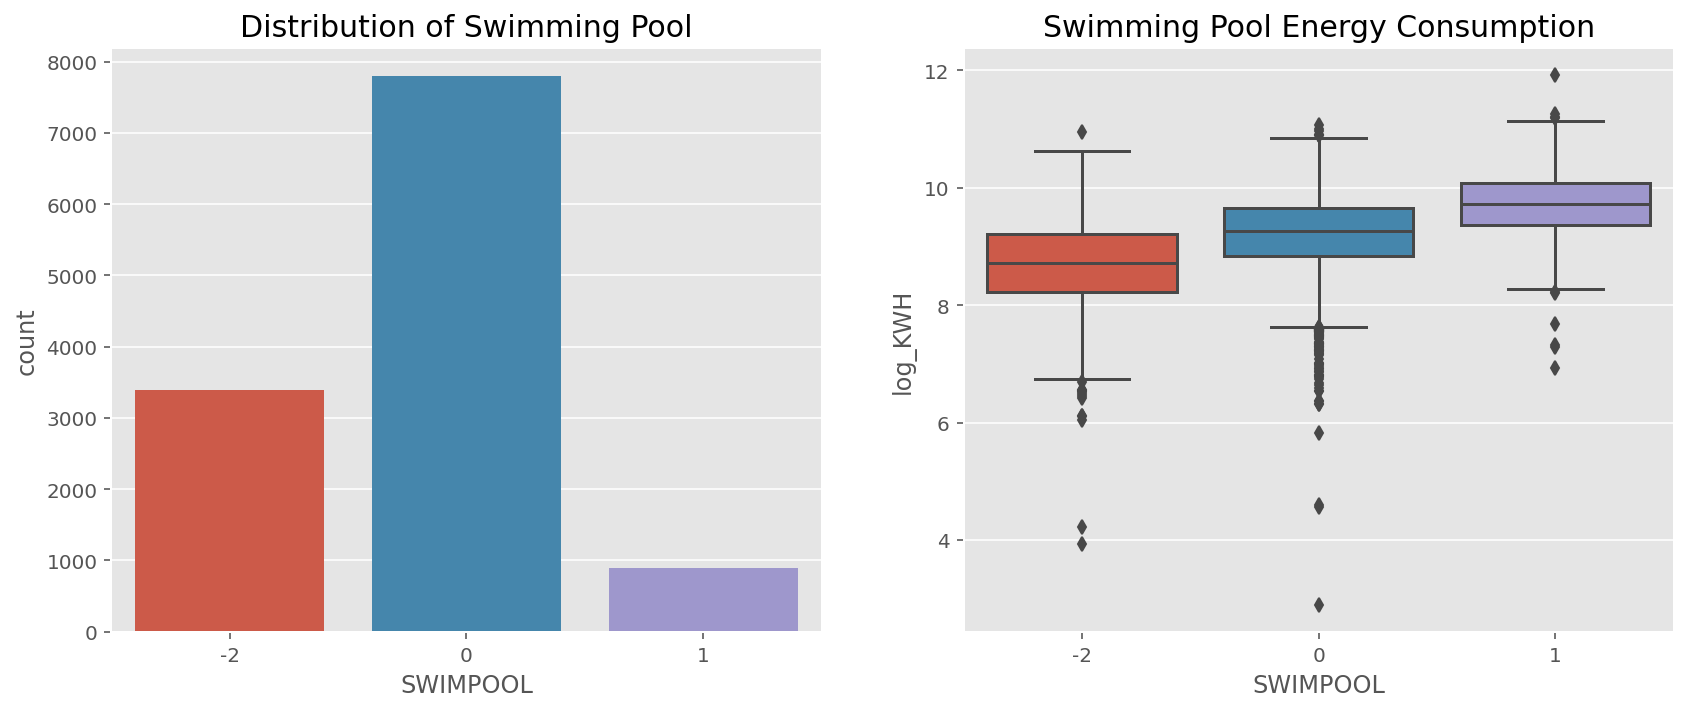

In [46]:
plt.figure(figsize=(14,6))
#I will explore the distribution of wall type and wall type by log_KWH
plt.subplot(121)
ax_pool = sns.countplot(x='SWIMPOOL', data=data)
ax_pool.set_title("Distribution of Swimming Pool", fontsize=15)


plt.subplot(122)
ax_pool = sns.boxplot(x ="SWIMPOOL",y="log_KWH", data=data)
ax_pool.set_title("Swimming Pool Energy Consumption", fontsize=15)


plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

Most houses don't have a swimming pool, but again, the pattern is very clear, that houses with swimming pools consume more electricity.

<a id="8"></a>
## 8. Data Preprocessing

<a id="81"></a>
### A. Dropping highly correlated variables

In [47]:
data.shape

(12083, 941)

In [48]:
data.drop(['BTUEL', 'log_KWH'], axis=1, inplace=True)

In [49]:
data.shape


(12083, 939)

<a id="82"></a>
### B. Checking the outlier

In [50]:
print(data.loc[data['KWH']>80000, 'KWH'])

3551    150254
Name: KWH, dtype: int64


<a id="83"></a>
### C. Removing the outlier

In [51]:
data.drop(3551, inplace=True)

In [52]:
data.shape

(12082, 939)

<a id="9"></a>
## 9.Feature Engineering

<a id="91"></a>
### A.Feature Extraction

We would like to add three new features into our datasets based on the importance of the features we got from the feature importance method earlier.<br>

The new features are as follow:<br>

1- Considering the space of the house with regards to number of rooms and number of complete bathrooms.<br>
2- Considering the energy consumption Ovenuse and Dishwasher use.<br>

In [53]:
data['squarefootage_KWH'] =  (data['TOTROOMS'] + data['NCOMBATH']) / data['TOTSQFT']

In [54]:
data.shape

(12082, 940)

In [55]:
data['squarefootage_KWH'].head()

0    0.001970443349754
1    0.001913265306122
2    0.005681818181818
3    0.004448838358873
4    0.003138075313808
Name: squarefootage_KWH, dtype: float64

Text(0, 0.5, 'Count')

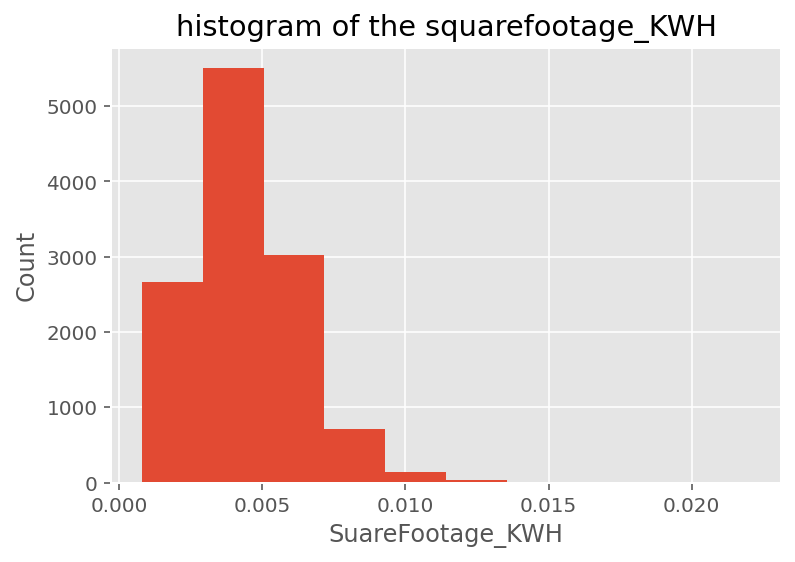

In [56]:
plt.hist(data['squarefootage_KWH'])
plt.title('histogram of the squarefootage_KWH')
plt.xlabel('SuareFootage_KWH')
plt.ylabel('Count')

In [57]:
data['DishwasherUse_OvenUse'] = (data['DWASHUSE'] + data['OVENUSE']) / data['KWH']

In [58]:
data.shape

(12082, 941)

In [59]:
data['DishwasherUse_OvenUse']

0        0.000866457272826
1        0.000388500388500
2        0.000450856627592
3        0.002396405391912
4        0.011850819100732
               ...        
12078    0.003138485680659
12079    0.002206287920574
12080    0.002338824486475
12081    0.000625000000000
12082    0.012471655328798
Name: DishwasherUse_OvenUse, Length: 12082, dtype: float64

In [60]:
corr_matrix = data.corr()

In [61]:
threshold_corr = 0.4
corr_significant = corr_matrix["KWH"].copy(deep =True)
corr_significant = corr_significant.loc[(corr_significant.values > threshold_corr) | \
                                       (corr_significant.values < -threshold_corr)]
print(f"Significant target variables are: \n\n {corr_significant.index[1:].values}\n")
print('*'*55)
print(f"\nAnd also their correaltions are: \n\n{(np.round(corr_significant[1:].values,2 ))}")

Significant target variables are: 

 ['NCOMBATH' 'TOTROOMS' 'ACROOMS' 'TOTHSQFT' 'TOTCSQFT' 'KWH' 'KWHSPH'
 'KWHCOL' 'KWHWTH' 'KWHRFG' 'KWHOTH' 'BTUELSPH' 'BTUELCOL' 'BTUELWTH'
 'BTUELRFG' 'BTUELOTH' 'DOLLAREL' 'DOLELSPH' 'DOLELCOL' 'DOLELWTH'
 'DOLELRFG' 'DOLELOTH' 'TOTALBTUCOL' 'TOTALBTURFG' 'TOTALBTUOTH'
 'TOTALDOL' 'TOTALDOLCOL' 'TOTALDOLWTH' 'TOTALDOLRFG' 'TOTALDOLOTH']

*******************************************************

And also their correaltions are: 

[0.41 0.43 0.44 0.41 0.48 1.   0.5  0.64 0.59 0.63 0.88 0.5  0.64 0.59
 0.63 0.88 0.86 0.45 0.59 0.52 0.42 0.7  0.64 0.63 0.67 0.61 0.59 0.44
 0.42 0.65]


**Result:** <br>

By getting insight from feature importance method, I created two new features and I assumed that those new features would have an acceptable correlation with my targer variable (KWH). However, after creating the new features and comparing their correlation with KWH, we can conclude that there is no strong correlation between the newly created features and our target variable. 

<a id="92"></a>
### B. Data Normalization

In [62]:
# selecting X and y
y = data.KWH 
X = data.drop('KWH', axis=1)

In [63]:
print(f'X shape is: {X.shape} and  y shape is: {y.shape}')

X shape is: (12082, 940) and  y shape is: (12082,)


In [64]:
# Label encoder
for c in data.columns[data.dtypes == 'object']:
    X[c] = X[c].factorize()[0]

In [65]:
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [67]:
print(f'X_train shape is:{X_train.shape} \nX_test shape is:{X_test.shape}\ny_train shape is:{y_train.shape}\ny_test shape is:{y_test.shape}')

X_train shape is:(8094, 940) 
X_test shape is:(3988, 940)
y_train shape is:(8094,)
y_test shape is:(3988,)


<a id="93"></a>
### C. Feature Selection based on Feature Importance

Based on GradientBoostingRegressor model, we will select the most important features that their importance is significant (more than threshold).

In [68]:
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.ensemble import GradientBoostingRegressor

In [69]:
thresh = 5e-4
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# eval model
select_X_val = selection.transform(X_test)
# test 
select_X_test = selection.transform(X_test)

In [70]:
print(f'select_X_train shape is: {select_X_train.shape}')

select_X_train shape is: (8094, 19)


<a id="10"></a>
## 10. Model developement

<a id='101'></a>
### A. Machine Learning Pipeline

In [71]:
########################################################
######## IMPORTING NECESSARY MODULES AND MODELS ########
########################################################
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error #To evaluate our model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE

Scaled_Ridge: 1.000000 (+/- 0.000000)
Scaled_Lasso: 0.996173 (+/- 0.001084)
Scaled_Elastic: 0.985650 (+/- 0.001022)
Scaled_RF_reg: 0.984605 (+/- 0.001733)
Scaled_ET_reg: 0.993289 (+/- 0.002237)
Scaled_BR_reg: 0.981913 (+/- 0.002436)
Scaled_Hub-Reg: 1.000000 (+/- 0.000000)
Scaled_BayRidge: 1.000000 (+/- 0.000000)
Scaled_XGB_reg: 0.994883 (+/- 0.000589)
Scaled_DT_reg: 0.957186 (+/- 0.007843)
Scaled_KNN_reg: 0.974518 (+/- 0.002368)
Scaled_ADA-Reg: 0.838982 (+/- 0.018921)
Scaled_Gboost-Reg: 0.990940 (+/- 0.000804)
Scaled_RFR_PCA: 0.947979 (+/- 0.006411)
Scaled_XGBR_PCA: 0.948929 (+/- 0.005671)


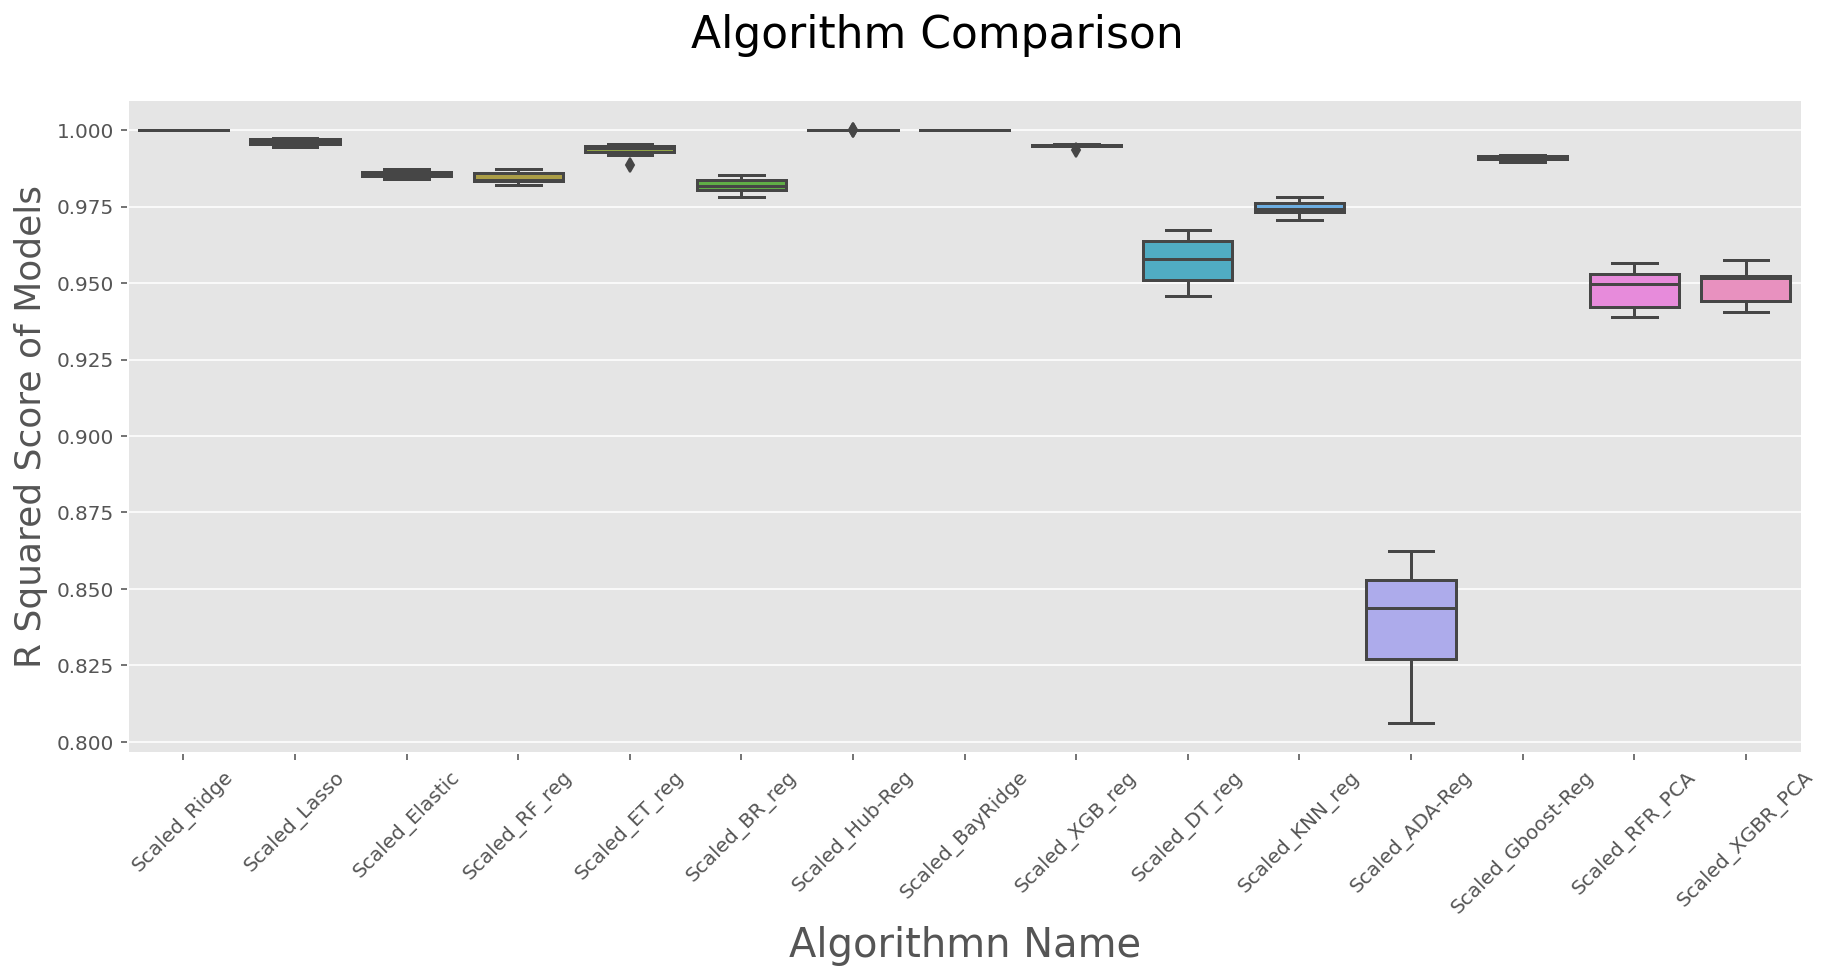

In [72]:
pipelines = []
seed = 5

pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Ridge", Ridge(random_state=seed, alpha= 0.1, tol=0.1, solver='auto' ))]
                 )))

pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Lasso", Lasso(random_state=seed, tol=0.1))]
                 )))

pipelines.append(
                ("Scaled_Elastic", 
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Lasso", ElasticNet(random_state=seed, tol=0.1))]
                 )))

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))]
                 )))

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))]
                 )))

pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))]
                 ))) 

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Hub-Reg", HuberRegressor())]
                 ))) 

pipelines.append(
                ("Scaled_BayRidge",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BayesianRidge())]
                 ))) 

pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed, n_estimators=300))]
                 ))) 

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())]
                 ))) 

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())]
                 )))
pipelines.append(
                ("Scaled_ADA-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ADA-reg", AdaBoostRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())]
                 )))

pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", RandomForestRegressor())]
                 )))

pipelines.append(
                ("Scaled_XGBR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", XGBRegressor())]
                 )))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'r2'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, select_X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn Name", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

From the comparison chart of the algorithms we can see that three of our models, namely Ridge, Hub Ridge, and Bay Ridge, had a very good results.

We measured the performace of our model using R2 square. The R-squared is calculated by dividing sum of squares of residuals from the regression model (given by SSres) by total sum of squares of errors from the average model (given by SStot) and then subtract it from 1.

$$R^2 =\frac{SSres}{SStot} =\frac{\Sigma_i (y_i -  \hat{y_i})^2 }{\Sigma_i (y_i - \bar{y_i})^2}$$

<a id="102"></a>
### B. Deep Learning

In [73]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [74]:
data_dummies =  pd.get_dummies(data)
# X and y for supervised learning
X = data_dummies.drop(['KWH'],axis = 1)
y = data_dummies['KWH']

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [76]:
My_Deep_Model = keras.Sequential()

In [77]:
X_train.shape[1]

1001

In [78]:
X.shape[1]

1001

In [79]:
My_Deep_Model = keras.Sequential()
My_Deep_Model.add(layers.Dense(64, activation="relu", input_dim=X.shape[1]))
My_Deep_Model.add(layers.Dense(32, activation="relu"))
My_Deep_Model.add(layers.Dense(1))


Instructions for updating:
Colocations handled automatically by placer.


In [80]:
My_Deep_Model.compile(loss='mse', optimizer='adam')

Instructions for updating:
Use tf.cast instead.


In [81]:
My_Deep_Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                64128     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 66,241
Trainable params: 66,241
Non-trainable params: 0
_________________________________________________________________


In [82]:
history = My_Deep_Model.fit(X,y , epochs=100 , batch_size=16)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
12082/12082 [==============================] - 2s 125us/sample - loss: 1848183.4860
Epoch 2/100
12082/12082 [==============================] - 1s 107us/sample - loss: 93931.1001
Epoch 3/100
12082/12082 [==============================] - 1s 113us/sample - loss: 180966.9179
Epoch 4/100
12082/12082 [==============================] - 1s 121us/sample - loss: 111338.7847
Epoch 5/100
12082/12082 [==============================] - 2s 133us/sample - loss: 29435.4404
Epoch 6/100
12082/12082 [==============================] - 1s 123us/sample - loss: 46046.4409
Epoch 7/100
12082/12082 [==============================] - 1s 117us/sample - loss: 84515.1300
Epoch 8/100
12082/12082 [==============================] - 1s 102us/sample - loss: 23036.8895
Epoch 9/100
12082/12082 [==============================] - 1s 102us/sample - loss: 38085.2941
Epoch 10/100
12082/12082 [==============================] - 1s 102us/sample - loss: 42203.9135
Epoch 1

In [83]:
history.history

{'loss': [1848183.4859753922,
  93931.1000534434,
  180966.91788113257,
  111338.78471743541,
  29435.440426939353,
  46046.4409311639,
  84515.13003048504,
  23036.889536293864,
  38085.294132105744,
  42203.91350159489,
  11544.854228607768,
  21862.36983451218,
  49992.42431586066,
  21365.196395957377,
  4947.9539989666555,
  5482.418699469437,
  12107.026618178288,
  7478.137346823076,
  14634.718456140123,
  14117.870220652243,
  3441.394250835336,
  10259.147923939829,
  6884.658845443991,
  9321.820257547142,
  10735.323118359182,
  6680.249650622733,
  4040.242334760828,
  6409.42599074451,
  10511.40842901873,
  4621.409984782484,
  5832.123849607031,
  2762.5526552369233,
  23935.650412149214,
  351.1277001230473,
  7516.219242614382,
  6308.995600374699,
  1510.8662707823394,
  5966.8116237979475,
  4041.7834354912757,
  3230.1638498797242,
  5156.021105340214,
  8244.872031712133,
  1673.7933990347171,
  5631.669137238312,
  5023.066299441634,
  2457.2319306012237,
  9535.

<a id="11"></a>
## 11. Summary and Conclusion

In this project, we investigated the Residential Energy Consumption based on KWH. 

The datset had many features (940 features) and to find the most important features to help to predict our objective variable  (KWH), I used feature importance using XGBoostRegressor to find the most informative features. 
I tried to explore the data using different visualisation techniques to identify the possible energy consumption trends.
Then I prepared the data in the preprocessing section for further analysis of Machine Learning and Deep Learning models. 
A diverce range of Machine Learning models had been used to find the best models. We have used Keras from the TensorFlow library to compare the results with traditional Machine Learning algorithms, too.

To wrap up this project, we can conclude that by using the feature importance method, we came to the conclusion that certain features such as the frequency of use of kitchen appliances and the house's square footage (number of bathrooms and bedrooms) have a direct effect on energy consumption.
In addition, only using Machine Learning models was satisfying enough for this project and we used Deep Learning for further research only. To evaluate the performance of our models we used R2-score. 

<a id="12"></a>
## 12. References

[1]. [Data](https://www.eia.gov/consumption/residential/data/2009/index.php?view=microdata)<br>
[2]. [Residential Energy Consumption Survey (RECS) End-Use Models FAQs](https://www.eia.gov/consumption/residential/methodology/2009/pdf/faqs-enduse-models022013.pdf)<br>
[3]. [Assessment of consumption and expenditure data collected from energy suppliers against bill data obtained from interviewed households: Case study with 2009 RECS](https://www.eia.gov/consumption/residential/data/2009/pdf/recs_ess_studypaper.pdf)<br>